<a href="https://colab.research.google.com/github/Llontaco/Planificacion-de-Procesos/blob/main/Planificaci%C3%B3nProcesos_SO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algoritmo FCFS



## Algortimo FCFS en Python



In [ ]:
import pandas as pd
import random
import matplotlib.pyplot as plt
from IPython.display import display


# === Simulación FCFS ===


def simular_fcfs(procesos_prueba):
    """Simula el algoritmo FCFS (First Come, First Served)."""
    procesos = [p.copy() for p in procesos_prueba]
    tiempo_actual = 0
    cola_listos = []
    terminados = []
    pendientes = sorted(procesos, key=lambda x: x["llegada"])
    idx = 0

    while idx < len(pendientes) or cola_listos:
        while idx < len(pendientes) and pendientes[idx]["llegada"] <= tiempo_actual:
            cola_listos.append(pendientes[idx])
            idx += 1

        cola_listos.sort(key=lambda x: x["llegada"])

        if cola_listos:
            p = cola_listos.pop(0)
            inicio = max(tiempo_actual, p["llegada"])
            fin = inicio + p["duracion"]
            retorno = fin - p["llegada"]
            espera = inicio - p["llegada"]
            respuesta = espera

            p.update({
                "inicio": inicio,
                "fin": fin,
                "retorno": retorno,
                "espera": espera,
                "respuesta": respuesta
            })

            terminados.append(p)
            tiempo_actual = fin
        else:
            tiempo_actual = pendientes[idx]["llegada"]

    return terminados



# === Métricas globales ===


def calcular_metricas_globales(procesos_terminados):
    """Calcula métricas promedio y globales del simulador."""
    if not procesos_terminados:
        return {}

    n = len(procesos_terminados)
    avg_retorno = sum(p["retorno"] for p in procesos_terminados) / n
    avg_espera = sum(p["espera"] for p in procesos_terminados) / n
    avg_respuesta = sum(p["respuesta"] for p in procesos_terminados) / n
    tiempo_total = max(p["fin"] for p in procesos_terminados)
    throughput = n / tiempo_total if tiempo_total > 0 else 0
    min_r, max_r = min(p["retorno"] for p in procesos_terminados), max(p["retorno"] for p in procesos_terminados)
    fairness = min_r / max_r if max_r > 0 else 0

    return {
        "Promedio de retorno": avg_retorno,
        "Promedio de espera": avg_espera,
        "Promedio de respuesta": avg_respuesta,
        "Throughput": throughput,
        "Fairness": fairness
    }



# === Generación de escenarios ===


def generar_escenario_A():
    """Escenario A: Mezcla de procesos cortos y largos."""
    procesos = []
    for i in range(1, 9):
        duracion = random.choice([random.randint(1, 4), random.randint(8, 20)])
        llegada = random.randint(0, 3)
        procesos.append({"id": f"{i}", "llegada": llegada, "duracion": duracion})
    return procesos


def generar_escenario_B():
    """Escenario B: CPU-bound vs I/O-bound."""
    procesos = []
    for i in range(1, 6):
        procesos.append({"id": f"{i}", "llegada": random.randint(0, 10),
                         "duracion": random.randint(10, 25), "tipo": "CPU"})
    for i in range(6, 11):
        procesos.append({"id": f"{i}", "llegada": random.randint(0, 10),
                         "duracion": random.randint(1, 3), "tipo": "IO"})
    return procesos


def generar_escenario_C():
    """Escenario C: Alta concurrencia vs baja concurrencia."""
    escenarios = []

    # Baja concurrencia
    baja = [
        {"id": f"{i}", "llegada": random.randint(0, 20), "duracion": random.randint(1, 10)}
        for i in range(1, random.randint(4, 6))
    ]
    escenarios.append(("Baja concurrencia", baja))

    # Alta concurrencia
    alta = [
        {"id": f"{i}", "llegada": random.randint(0, 5), "duracion": random.randint(1, 10)}
        for i in range(1, random.randint(20, 30))
    ]
    escenarios.append(("Alta concurrencia", alta))
    return escenarios


# === Diagrama de Gantt ===


def diagrama_gantt(terminados, titulo="Diagrama de Gantt - FCFS"):
    fig, ax = plt.subplots()
    tiene_tipo = any("tipo" in p for p in terminados)
    colores_tipo = {"CPU": "orange", "IO": "skyblue"}

    for i, p in enumerate(terminados, start=1):
        p["mostrar_id"] = f"P{i}"

    if tiene_tipo:
        for p in terminados:
            color = colores_tipo.get(p.get("tipo"), "lightgray")
            ax.barh(p["mostrar_id"], p["duracion"], left=p["inicio"], height=0.5, color=color)

        handles = [
            plt.Rectangle((0, 0), 1, 1, color=colores_tipo["CPU"]),
            plt.Rectangle((0, 0), 1, 1, color=colores_tipo["IO"])
        ]
        ax.legend(handles, ["CPU-bound", "I/O-bound"])
    else:
        colores = plt.cm.tab10.colors
        for i, p in enumerate(terminados):
            ax.barh(p["mostrar_id"], p["duracion"], left=p["inicio"], height=0.5,
                    color=colores[i % len(colores)])

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Procesos")
    ax.set_title(titulo)
    plt.tight_layout()
    plt.show()


# === Función para ejecutar y mostrar resultados ===


def ejecutar_y_mostrar(procesos, nombre_escenario=""):
    print(f"\n{'='*60}")
    print(f"=== {nombre_escenario} ===")
    print(f"{'='*60}")

    resultados = simular_fcfs(procesos)
    tiene_tipo = any("tipo" in p for p in procesos)
    columnas = (
        ["id", "tipo", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"]
        if tiene_tipo
        else ["id", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"]
    )

    df = pd.DataFrame(resultados)[columnas]
    display(df.style.hide(axis="index").set_caption(""))

    print("\nMétricas globales:")
    metricas = calcular_metricas_globales(resultados)
    for k, v in metricas.items():
        print(f"  {k}: {v:.2f}")

    diagrama_gantt(resultados, f"Diagrama de Gantt - {nombre_escenario}")




# === Ejecución de los escenarios ===


if __name__ == "__main__":
    random.seed(42)


    print("EJECUTANDO TODOS LOS ESCENARIOS AUTOMÁTICAMENTE")

    # --- Escenario A ---
    procesos_A = generar_escenario_A()
    ejecutar_y_mostrar(procesos_A, "Escenario A: Mezcla de procesos cortos y largos")

    # --- Escenario B ---
    procesos_B = generar_escenario_B()
    ejecutar_y_mostrar(procesos_B, "Escenario B: CPU-bound vs I/O-bound")

    # --- Escenario C ---
    print("\n" + "="*60)
    print("=== Escenario C: Alta concurrencia vs baja concurrencia ===")
    print("="*60)
    escenarios_C = generar_escenario_C()
    for nombre, procesos_C in escenarios_C:
        ejecutar_y_mostrar(procesos_C, f"Escenario C - {nombre}")

## Escenario A: Mezcla de procesos cortos y largos
En este escenario se busca analizar cómo el algoritmo FCFS (First Come, First Served) gestiona una cola de procesos que poseen duraciones muy variadas, combinando trabajos cortos y largos.
Todos los procesos llegan en diferentes momentos, lo que permite observar el efecto del orden de llegada sobre el tiempo de espera y el rendimiento general del sistema.
Este tipo de situación es común en entornos multitarea donde se ejecutan simultáneamente tareas rápidas y operaciones que requieren mayor tiempo de procesamiento, como aplicaciones de oficina, servicios web y procesamiento de archivos.

### Experimento 1- Duraciones Similares


=== Escenario A - Experimento 1 (Duraciones similares) ===


id,llegada,duracion,inicio,fin,retorno,espera,respuesta
P1,0,4,0,4,4,0,0
P2,1,5,4,9,8,3,3
P3,2,4,9,13,11,7,7
P4,3,5,13,18,15,10,10
P5,4,4,18,22,18,14,14



Métricas globales:
  Promedio de retorno: 11.20
  Promedio de espera: 6.80
  Promedio de respuesta: 6.80
  Throughput: 0.23
  Fairness: 0.22


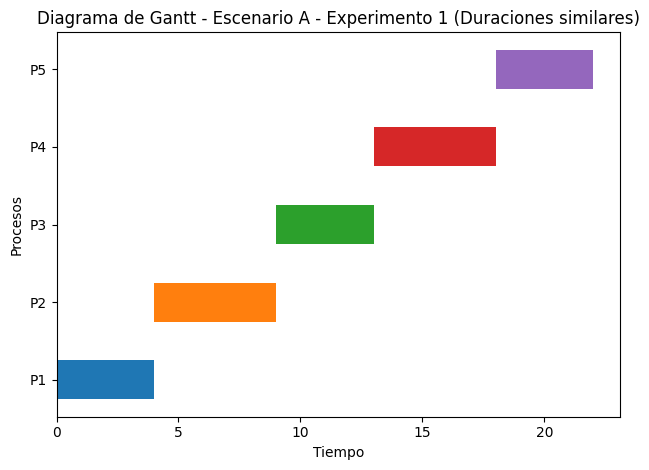

In [ ]:
procesos_exp1_A = [
    {"id": "P1", "llegada": 0, "duracion": 4},
    {"id": "P2", "llegada": 1, "duracion": 5},
    {"id": "P3", "llegada": 2, "duracion": 4},
    {"id": "P4", "llegada": 3, "duracion": 5},
    {"id": "P5", "llegada": 4, "duracion": 4},
]
ejecutar_y_mostrar(procesos_exp1_A, "Escenario A - Experimento 1 (Duraciones similares)")


### Experimento 2 — Procesos con duraciones variadas


=== Escenario A - Experimento 2 (Duraciones variadas) ===


id,llegada,duracion,inicio,fin,retorno,espera,respuesta
P1,0,2,0,2,2,0,0
P2,1,8,2,10,9,1,1
P3,2,4,10,14,12,8,8
P4,3,10,14,24,21,11,11
P5,5,3,24,27,22,19,19



Métricas globales:
  Promedio de retorno: 13.20
  Promedio de espera: 7.80
  Promedio de respuesta: 7.80
  Throughput: 0.19
  Fairness: 0.09


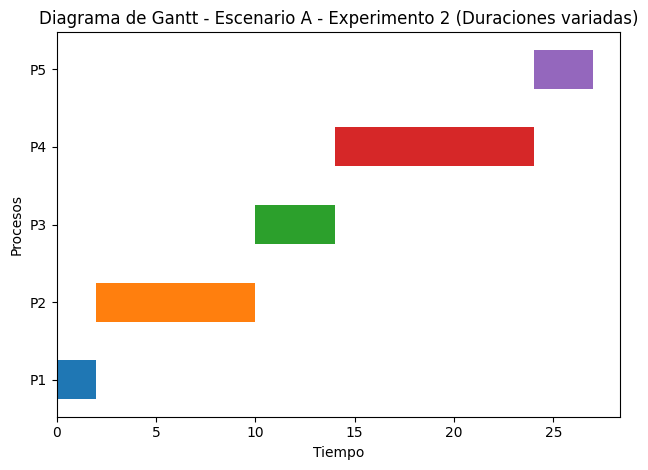

In [ ]:
procesos_exp2_A = [
    {"id": "P1", "llegada": 0, "duracion": 2},
    {"id": "P2", "llegada": 1, "duracion": 8},
    {"id": "P3", "llegada": 2, "duracion": 4},
    {"id": "P4", "llegada": 3, "duracion": 10},
    {"id": "P5", "llegada": 5, "duracion": 3},
]
ejecutar_y_mostrar(procesos_exp2_A, "Escenario A - Experimento 2 (Duraciones variadas)")


### Experimento 3 — Muchos procesos con duraciones variadas


=== Escenario A - Experimento 3 (Muchos procesos variados) ===


id,llegada,duracion,inicio,fin,retorno,espera,respuesta
P5,0,14,0,14,14,0,0
P6,0,15,14,29,29,14,14
P7,0,4,29,33,33,29,29
P3,1,4,33,37,36,32,32
P1,3,11,37,48,45,34,34
P2,3,7,48,55,52,45,45
P11,3,8,55,63,60,52,52
P4,4,9,63,72,68,59,59
P10,4,3,72,75,71,68,68
P12,4,9,75,84,80,71,71



Métricas globales:
  Promedio de retorno: 63.64
  Promedio de espera: 55.29
  Promedio de respuesta: 55.29
  Throughput: 0.12
  Fairness: 0.12


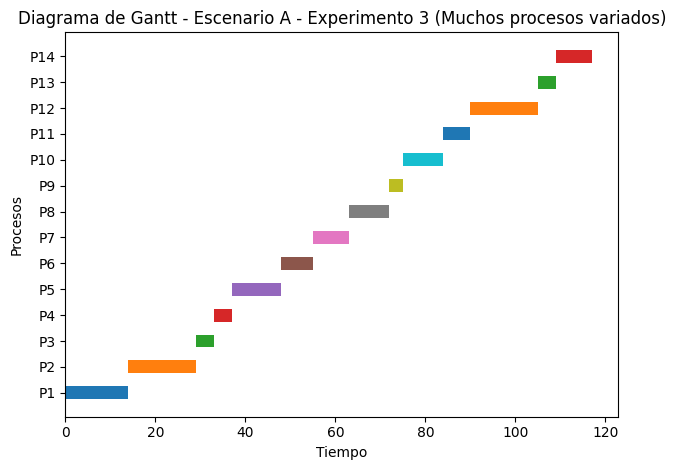

In [ ]:
procesos_exp3_A = [
    {"id": f"P{i}", "llegada": random.randint(0, 5), "duracion": random.randint(2, 15)}
    for i in range(1, 15)
]
ejecutar_y_mostrar(procesos_exp3_A, "Escenario A - Experimento 3 (Muchos procesos variados)")


##Escenario B: Procesos de CPU-bound vs I/O-bound
En este escenario se busca analizar cómo el algoritmo FCFS (First Come, First Served) gestiona una cola de procesos con diferentes tipos de carga de trabajo: CPU-bound (procesos que consumen mucho tiempo de CPU) e I/O-bound (procesos que requieren más operaciones de entrada y salida).
Cada proceso llega en momentos distintos y presenta diferentes duraciones, lo que permite observar cómo el orden de llegada influye directamente en el rendimiento general del sistema.
Este tipo de escenario es común en entornos donde coexisten tareas pesadas de cálculo con operaciones frecuentes de acceso a disco, red o dispositivos externos, como en servidores multitarea o sistemas operativos de propósito general.

###Experimento 1 — Mezcla equilibrada de procesos CPU e I/O


=== Escenario B - Experimento 1 (Mezcla equilibrada CPU/I-O) ===


id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
P1,CPU,0,10,0,10,10,0,0
P2,IO,2,3,10,13,11,8,8
P3,CPU,4,12,13,25,21,9,9
P4,IO,6,2,25,27,21,19,19
P5,CPU,7,8,27,35,28,20,20



Métricas globales:
  Promedio de retorno: 18.20
  Promedio de espera: 11.20
  Promedio de respuesta: 11.20
  Throughput: 0.14
  Fairness: 0.36


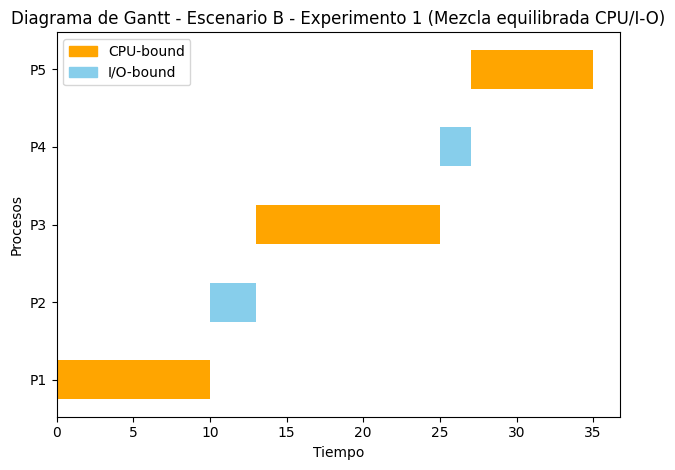

In [ ]:
procesos_exp1_B = [
    {"id": "P1", "llegada": 0, "duracion": 10, "tipo": "CPU"},
    {"id": "P2", "llegada": 2, "duracion": 3, "tipo": "IO"},
    {"id": "P3", "llegada": 4, "duracion": 12, "tipo": "CPU"},
    {"id": "P4", "llegada": 6, "duracion": 2, "tipo": "IO"},
    {"id": "P5", "llegada": 7, "duracion": 8, "tipo": "CPU"},
]
ejecutar_y_mostrar(procesos_exp1_B, "Escenario B - Experimento 1 (Mezcla equilibrada CPU/I-O)")


###Experimento 2 — Sistema dominado por procesos CPU-bound


=== Escenario B - Experimento 2 (Dominado por CPU-bound) ===


id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
P1,CPU,0,20,0,20,20,0,0
P2,CPU,1,18,20,38,37,19,19
P3,CPU,2,15,38,53,51,36,36
P4,IO,3,2,53,55,52,50,50
P5,IO,4,1,55,56,52,51,51



Métricas globales:
  Promedio de retorno: 42.40
  Promedio de espera: 31.20
  Promedio de respuesta: 31.20
  Throughput: 0.09
  Fairness: 0.38


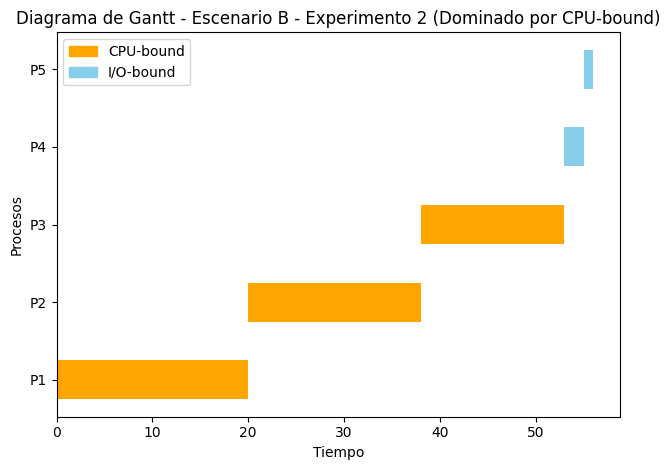

In [ ]:
procesos_exp2_B = [
    {"id": "P1", "llegada": 0, "duracion": 20, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 18, "tipo": "CPU"},
    {"id": "P3", "llegada": 2, "duracion": 15, "tipo": "CPU"},
    {"id": "P4", "llegada": 3, "duracion": 2, "tipo": "IO"},
    {"id": "P5", "llegada": 4, "duracion": 1, "tipo": "IO"},
]
ejecutar_y_mostrar(procesos_exp2_B, "Escenario B - Experimento 2 (Dominado por CPU-bound)")


###Experimento 3 — Sistema dominado por procesos I/O-bound


=== Escenario B - Experimento 3 (Dominado por I/O-bound) ===


id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
P1,IO,0,2,0,2,2,0,0
P2,IO,1,3,2,5,4,1,1
P3,IO,2,2,5,7,5,3,3
P4,CPU,3,12,7,19,16,4,4
P5,IO,4,2,19,21,17,15,15



Métricas globales:
  Promedio de retorno: 8.80
  Promedio de espera: 4.60
  Promedio de respuesta: 4.60
  Throughput: 0.24
  Fairness: 0.12


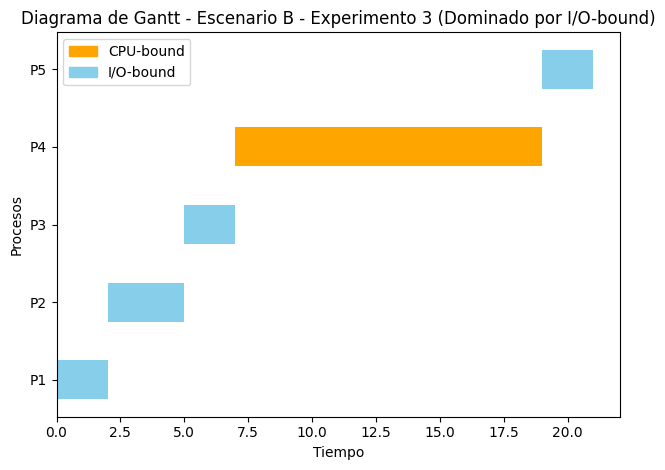

In [ ]:
procesos_exp3_B = [
    {"id": "P1", "llegada": 0, "duracion": 2, "tipo": "IO"},
    {"id": "P2", "llegada": 1, "duracion": 3, "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 2, "tipo": "IO"},
    {"id": "P4", "llegada": 3, "duracion": 12, "tipo": "CPU"},
    {"id": "P5", "llegada": 4, "duracion": 2, "tipo": "IO"},
]
ejecutar_y_mostrar(procesos_exp3_B, "Escenario B - Experimento 3 (Dominado por I/O-bound)")


###Experimento 4 — Sistema aleatorio de procesos


=== Escenario B - Experimento 4 (Sistema aleatorio de procesos) ===


id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
P1,IO,0,4,0,4,4,0,0
P4,CPU,0,9,4,13,13,4,4
P10,IO,1,12,13,25,24,12,12
P7,CPU,2,12,25,37,35,23,23
P11,CPU,3,2,37,39,36,34,34
P2,IO,5,4,39,43,38,34,34
P9,CPU,5,16,43,59,54,38,38
P3,IO,6,6,59,65,59,53,53
P5,IO,8,4,65,69,61,57,57
P6,CPU,8,20,69,89,81,61,61



Métricas globales:
  Promedio de retorno: 45.73
  Promedio de espera: 36.09
  Promedio de respuesta: 36.09
  Throughput: 0.10
  Fairness: 0.04


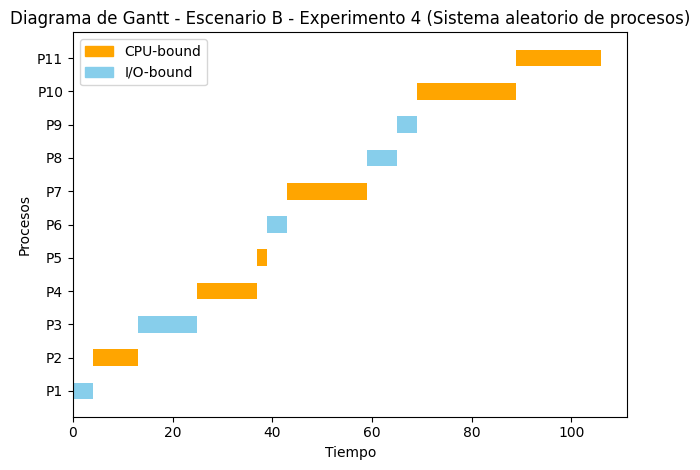

In [ ]:
procesos_exp4_B = [
    {"id": f"P{i}", "llegada": random.randint(0, 8),
     "duracion": random.randint(1, 20),
     "tipo": random.choice(["CPU", "IO"])}
    for i in range(1, 12)
]
ejecutar_y_mostrar(procesos_exp4_B, "Escenario B - Experimento 4 (Sistema aleatorio de procesos)")


##Escenario C: Alta concurrencia vs Baja concurrencia
En este escenario se busca analizar cómo el algoritmo FCFS (First Come, First Served) gestiona una cola de procesos que poseen duraciones muy variadas, combinando trabajos cortos y largos.
Todos los procesos llegan en diferentes momentos, lo que permite observar el efecto del orden de llegada sobre el tiempo de espera y el rendimiento general del sistema.
Este tipo de situación es común en entornos multitarea donde se ejecutan simultáneamente tareas rápidas y operaciones que requieren mayor tiempo de procesamiento, como aplicaciones de oficina, servicios web y procesamiento de archivos.

###Experimento 1 — Alta concurrencia


=== Escenario C - Experimento 1 (Alta concurrencia) ===


id,llegada,duracion,inicio,fin,retorno,espera,respuesta
P1,0,3,0,3,3,0,0
P12,0,7,3,10,10,3,3
P13,0,10,10,20,20,10,10
P15,0,3,20,23,23,20,20
P16,0,5,23,28,28,23,23
P17,0,2,28,30,30,28,28
P3,1,4,30,34,33,29,29
P5,1,6,34,40,39,33,33
P7,1,6,40,46,45,39,39
P11,1,5,46,51,50,45,45



Métricas globales:
  Promedio de retorno: 50.74
  Promedio de espera: 45.32
  Promedio de respuesta: 45.32
  Throughput: 0.18
  Fairness: 0.03


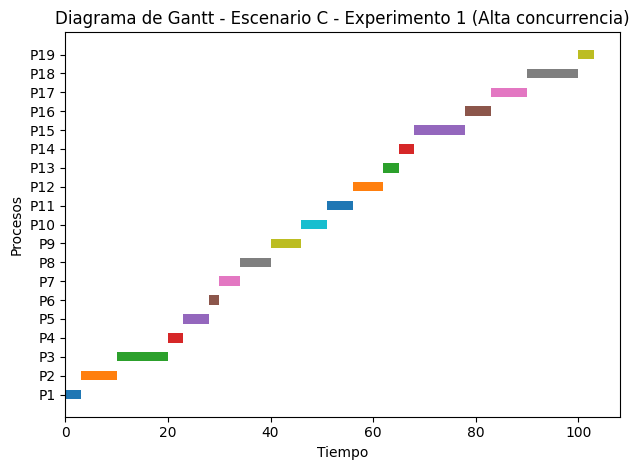

In [ ]:
procesos_exp1_C = [
    {"id": f"P{i}", "llegada": random.randint(0, 3), "duracion": random.randint(2, 10)}
    for i in range(1, 20)
]
ejecutar_y_mostrar(procesos_exp1_C, "Escenario C - Experimento 1 (Alta concurrencia)")


###Experimento 2 — Baja concurrencia


=== Escenario C - Experimento 2 (Baja concurrencia) ===


id,llegada,duracion,inicio,fin,retorno,espera,respuesta
P1,0,8,0,8,8,0,0
P2,10,6,10,16,6,0,0
P3,20,5,20,25,5,0,0



Métricas globales:
  Promedio de retorno: 6.33
  Promedio de espera: 0.00
  Promedio de respuesta: 0.00
  Throughput: 0.12
  Fairness: 0.62


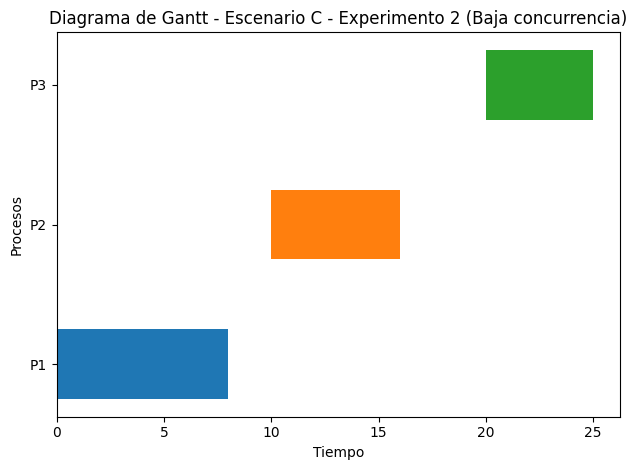

In [ ]:
procesos_exp2_C = [
    {"id": "P1", "llegada": 0, "duracion": 8},
    {"id": "P2", "llegada": 10, "duracion": 6},
    {"id": "P3", "llegada": 20, "duracion": 5},
]
ejecutar_y_mostrar(procesos_exp2_C, "Escenario C - Experimento 2 (Baja concurrencia)")


#Algoritmo SJF





## Algortimo SJF en Python

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def simular_sjf(procesosPrueba):
    procesos = [p.copy() for p in procesosPrueba]
    tiempo_actual = 0
    terminados = []

    pendientes = sorted(procesos, key=lambda x: x["llegada"])

    while pendientes:
        # Procesos que ya han llegado en tiempo_actual
        llegados = [p for p in pendientes if p["llegada"] <= tiempo_actual]

        if not llegados:
            # Si no hay ninguno, avanzar al siguiente tiempo de llegada
            tiempo_actual = pendientes[0]["llegada"]
            llegados = [p for p in pendientes if p["llegada"] <= tiempo_actual]

        # Elegir el de menor duracion entre los llegados
        elegido = min(llegados, key=lambda x: x["duracion"])

        inicio = max(tiempo_actual, elegido["llegada"])
        fin = inicio + elegido["duracion"]
        retorno = fin - elegido["llegada"]
        espera = inicio - elegido["llegada"]
        respuesta = espera

        elegido.update({
            "inicio": inicio,
            "fin": fin,
            "retorno": retorno,
            "espera": espera,
            "respuesta": respuesta
        })

        tiempo_actual = fin
        terminados.append(elegido)
        pendientes.remove(elegido)

    # --- Métricas globales ---
    n = len(terminados)
    promedio_retorno = sum(p["retorno"] for p in terminados) / n
    promedio_espera = sum(p["espera"] for p in terminados) / n
    promedio_respuesta = sum(p["respuesta"] for p in terminados) / n
    throughput = n / tiempo_actual if tiempo_actual > 0 else 0
    min_retorno = min(p["retorno"] for p in terminados)
    max_retorno = max(p["retorno"] for p in terminados)
    fairness = min_retorno / max_retorno if max_retorno > 0 else 0

    # --- Mostrar tabla ---
    tiene_tipo = any("tipo" in p for p in procesosPrueba)
    columnas = ["id", "tipo", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"] if tiene_tipo \
        else ["id", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"]
    df = pd.DataFrame(terminados)[columnas]
    display(df.style.set_caption(""))

    # --- Impresión de métricas ---
    print("\n--- Métricas Globales (SJF correcto) ---")
    print(f"Promedio Retorno:   {promedio_retorno:.2f}")
    print(f"Promedio Espera:    {promedio_espera:.2f}")
    print(f"Promedio Respuesta: {promedio_respuesta:.2f}")
    print(f"Throughput:         {throughput:.2f} procesos/unidad tiempo")
    print(f"Equidad (Fairness): {fairness:.2f}")

    # --- Diagrama de Gantt ---
    fig, ax = plt.subplots()
    colores_tipo = {"CPU": "orange", "IO": "skyblue"}

    if tiene_tipo:
        # Detectar los tipos presentes en esta simulación
        tipos_presentes = sorted(set(p["tipo"] for p in terminados))
        for p in terminados:
            color = colores_tipo.get(p.get("tipo"), "lightgray")
            ax.barh(p["id"], p["duracion"], left=p["inicio"], height=0.5, color=color)
            ax.text(p["inicio"] + p["duracion"]/2, p["id"], p.get("tipo", ""), ha="center", va="center", fontsize=8)

        # Mostrar solo las etiquetas correspondientes a los tipos que realmente aparecen
        handles = []
        labels = []
        for tipo in tipos_presentes:
            handles.append(plt.Rectangle((0, 0), 1, 1, color=colores_tipo.get(tipo, "lightgray")))
            labels.append("CPU-bound" if tipo == "CPU" else "I/O-bound")

        ax.legend(handles, labels)

    else:
        # Caso sin tipo: colores automáticos
        colores = plt.cm.tab10.colors
        for i, p in enumerate(terminados):
            ax.barh(p["id"], p["duracion"], left=p["inicio"], height=0.5, color=colores[i % len(colores)])

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Procesos")
    ax.set_title("Diagrama de Gantt - SJF")
    plt.show()

## Escenario: Mezcla de procesos cortos y largos
En este escenario se busca analizar cómo el algoritmo SJF (Shortest Job First) maneja una cola de procesos que presentan diferentes duraciones.  
Todos los procesos llegan al mismo tiempo (instante 0), pero tienen duraciones distintas.  
Este tipo de escenario es común en sistemas donde coexisten tareas cortas e intensivas en CPU.


### Experimento 1 (Procesos con duraciones similares)  


#### Tabla de procesos

| Proceso | Tiempo de llegada | Duración (CPU burst) |
|----------|------------------|----------------------|
| P1 | 0 | 2 |
| P2 | 0 | 8 |
| P3 | 0 | 4 |
| P4 | 0 | 1 |
| P5 | 0 | 10 |


,id,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P4,0,1,0,1,1,0,0
1,P1,0,2,1,3,3,1,1
2,P3,0,4,3,7,7,3,3
3,P2,0,8,7,15,15,7,7
4,P5,0,10,15,25,25,15,15



--- Métricas Globales (SJF correcto) ---
Promedio Retorno:   10.20
Promedio Espera:    5.20
Promedio Respuesta: 5.20
Throughput:         0.20 procesos/unidad tiempo
Equidad (Fairness): 0.04


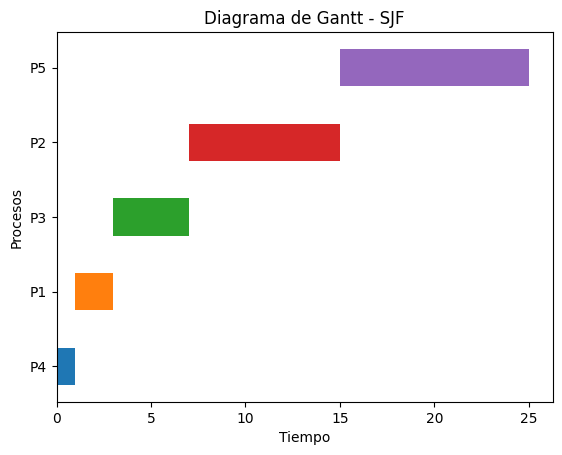

In [ ]:
# Definición de los procesos
procesos_exp1 = [
    {"id": "P1", "llegada": 0, "duracion": 2},
    {"id": "P2", "llegada": 0, "duracion": 8},
    {"id": "P3", "llegada": 0, "duracion": 4},
    {"id": "P4", "llegada": 0, "duracion": 1},
    {"id": "P5", "llegada": 0, "duracion": 10},
]

simular_sjf(procesos_exp1)

### Experimento 2 (Procesos con duraciones variadas)  

#### Tabla de procesos

| Proceso | Tiempo de llegada | Duración (CPU burst) |
|----------|------------------|----------------------|
| P1 | 0 | 3 |
| P2 | 0 | 18 |
| P3 | 0 | 26 |
| P4 | 0 | 12 |
| P5 | 0 | 40 |
| P6 | 0 | 8 |

,id,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P1,0,3,0,3,3,0,0
1,P6,0,8,3,11,11,3,3
2,P4,0,12,11,23,23,11,11
3,P2,0,18,23,41,41,23,23
4,P3,0,26,41,67,67,41,41
5,P5,0,40,67,107,107,67,67



--- Métricas Globales (SJF correcto) ---
Promedio Retorno:   42.00
Promedio Espera:    24.17
Promedio Respuesta: 24.17
Throughput:         0.06 procesos/unidad tiempo
Equidad (Fairness): 0.03


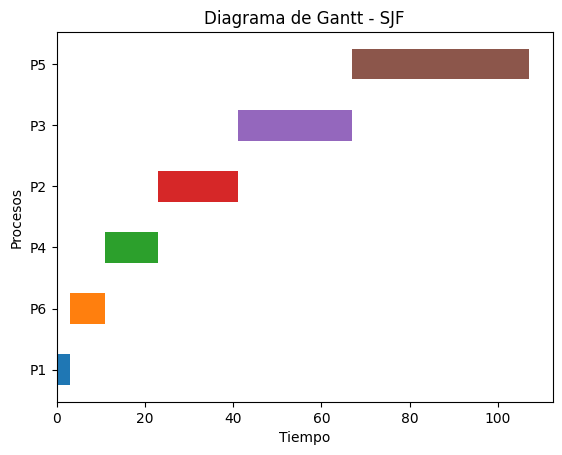

In [ ]:
# Definición de los procesos
procesos_exp2 = [
    {"id": "P1", "llegada": 0, "duracion": 3},
    {"id": "P2", "llegada": 0, "duracion": 18},
    {"id": "P3", "llegada": 0, "duracion": 26},
    {"id": "P4", "llegada": 0, "duracion": 12},
    {"id": "P5", "llegada": 0, "duracion": 40},
    {"id": "P6", "llegada": 0, "duracion": 8},
]

simular_sjf(procesos_exp2)

### Experimento 3 (Muchos procesos con duraciones variadas)  

#### Tabla de procesos

| Proceso | Tiempo de llegada | Duración (CPU burst) |
|----------|------------------|----------------------|
| P1 | 0 | 72 |
| P2 | 0 | 15 |
| P3 | 0 | 38 |
| P4 | 0 | 5 |
| P5 | 0 | 61 |
| P6 | 0 | 29|
| P7 | 0 | 47 |
| P8 | 0 | 80 |
| P9 | 0 | 3 |
| P10 | 0 | 55|


,id,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P9,0,3,0,3,3,0,0
1,P4,0,5,3,8,8,3,3
2,P2,0,15,8,23,23,8,8
3,P6,0,29,23,52,52,23,23
4,P3,0,38,52,90,90,52,52
5,P7,0,47,90,137,137,90,90
6,P10,0,55,137,192,192,137,137
7,P5,0,61,192,253,253,192,192
8,P1,0,72,253,325,325,253,253
9,P8,0,80,325,405,405,325,325



--- Métricas Globales (SJF correcto) ---
Promedio Retorno:   148.80
Promedio Espera:    108.30
Promedio Respuesta: 108.30
Throughput:         0.02 procesos/unidad tiempo
Equidad (Fairness): 0.01


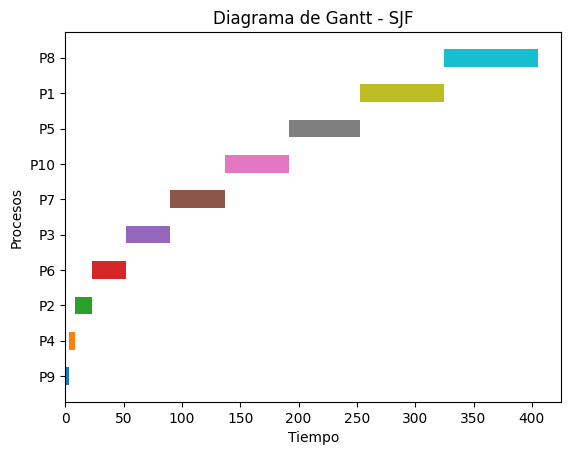

In [ ]:
# Definición de los procesos
procesos_exp3 = [
    {"id": "P1", "llegada": 0, "duracion": 72},
    {"id": "P2", "llegada": 0, "duracion": 15},
    {"id": "P3", "llegada": 0, "duracion": 38},
    {"id": "P4", "llegada": 0, "duracion": 5},
    {"id": "P5", "llegada": 0, "duracion": 61},
    {"id": "P6", "llegada": 0, "duracion": 29},
    {"id": "P7", "llegada": 0, "duracion": 47},
    {"id": "P8", "llegada": 0, "duracion": 80},
    {"id": "P9", "llegada": 0, "duracion": 3},
    {"id": "P10","llegada": 0, "duracion": 55},
]

simular_sjf(procesos_exp3)

## Escenario: Procesos de CPU-bound vs I/O-bound
En este escenario se busca analizar cómo el algoritmo SJF (Shortest Job First) maneja una cola de procesos que presentan diferentes prioridades (CPU-bound y I/O-bound).  
Todos los procesos llegan a tiempos distintos, pero tienen duraciones y prioridades distintas.  
Este tipo de escenario son comunes en tareas computacionalmente intensivas como simulaciones, procesamiento de datos y criptografía.

### Experimento 1 (Mezcla equilibrada de procesos CPU e I/O)  


#### Tabla de procesos

| Proceso | Tipo | Tiempo de llegada | Duración (CPU burst) |
|----------|------|------------------|----------------------|
| P1 | CPU | 0 | 10 |
| P2 | IO  | 1 | 3  |
| P3 | CPU | 2 | 8  |
| P4 | IO  | 3 | 2  |
| P5 | IO  | 4 | 1  |
| P6 | CPU | 5 | 12 |

,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P1,CPU,0,10,0,10,10,0,0
1,P5,IO,4,1,10,11,7,6,6
2,P4,IO,3,2,11,13,10,8,8
3,P2,IO,1,3,13,16,15,12,12
4,P3,CPU,2,8,16,24,22,14,14
5,P6,CPU,5,12,24,36,31,19,19



--- Métricas Globales (SJF correcto) ---
Promedio Retorno:   15.83
Promedio Espera:    9.83
Promedio Respuesta: 9.83
Throughput:         0.17 procesos/unidad tiempo
Equidad (Fairness): 0.23


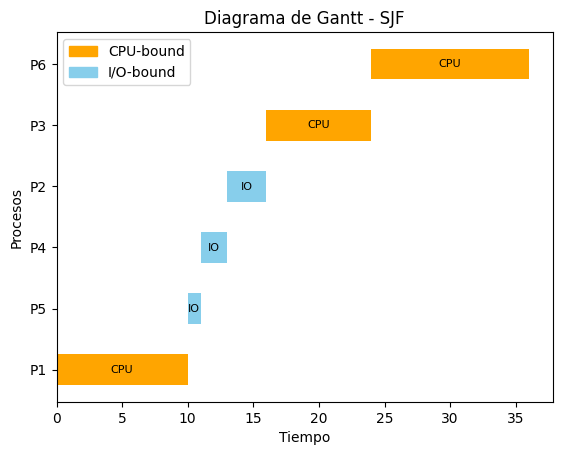

In [ ]:
procesos_exp4 = [
    {"id": "P1", "llegada": 0, "duracion": 10, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 3,  "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 8,  "tipo": "CPU"},
    {"id": "P4", "llegada": 3, "duracion": 2,  "tipo": "IO"},
    {"id": "P5", "llegada": 4, "duracion": 1,  "tipo": "IO"},
    {"id": "P6", "llegada": 5, "duracion": 12, "tipo": "CPU"},
]
simular_sjf(procesos_exp4)

### Experimento 2 (Sistema dominado por procesos CPU-bound)  


#### Tabla de procesos

| Proceso | Tipo | Tiempo de llegada | Duración (CPU burst) |
|----------|------|------------------|----------------------|
| P1 | CPU | 0 | 12 |
| P2 | CPU | 1 | 15 |
| P3 | CPU | 3 | 10 |
| P4 | CPU | 4 | 9  |

,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P1,CPU,0,12,0,12,12,0,0
1,P5,IO,6,3,12,15,9,6,6
2,P4,CPU,4,9,15,24,20,11,11
3,P3,CPU,3,10,24,34,31,21,21
4,P2,CPU,1,15,34,49,48,33,33



--- Métricas Globales (SJF correcto) ---
Promedio Retorno:   24.00
Promedio Espera:    14.20
Promedio Respuesta: 14.20
Throughput:         0.10 procesos/unidad tiempo
Equidad (Fairness): 0.19


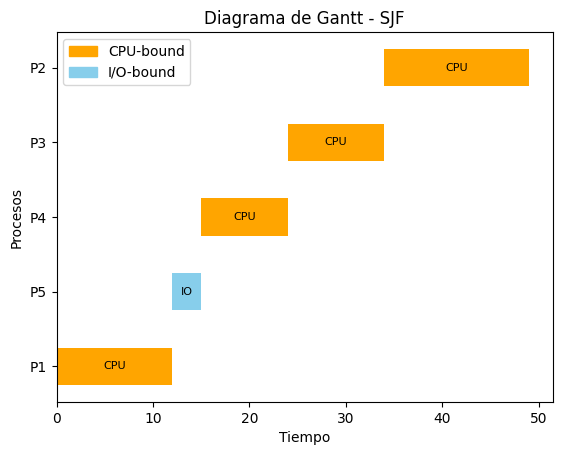

In [ ]:
procesos_exp5 = [
    {"id": "P1", "llegada": 0, "duracion": 12, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 15, "tipo": "CPU"},
    {"id": "P3", "llegada": 3, "duracion": 10, "tipo": "CPU"},
    {"id": "P4", "llegada": 4, "duracion": 9,  "tipo": "CPU"},
    {"id": "P5", "llegada": 6, "duracion": 3,  "tipo": "IO"},
]
simular_sjf(procesos_exp5)


### Experimento 3 (Sistema dominado por I/O-bound)  


#### Tabla de procesos
| Proceso | Tipo | Tiempo de llegada | Duración (CPU burst) |
|----------|------|------------------|----------------------|
| P1 | IO  | 0 | 2 |
| P2 | IO  | 1 | 1 |
| P3 | IO  | 2 | 3 |
| P4 | CPU | 3 | 8 |
| P5 | CPU | 4 | 10 |


,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P1,IO,0,2,0,2,2,0,0
1,P2,IO,1,1,2,3,2,1,1
2,P3,IO,2,3,3,6,4,1,1
3,P4,CPU,3,8,6,14,11,3,3
4,P5,CPU,4,10,14,24,20,10,10



--- Métricas Globales (SJF correcto) ---
Promedio Retorno:   7.80
Promedio Espera:    3.00
Promedio Respuesta: 3.00
Throughput:         0.21 procesos/unidad tiempo
Equidad (Fairness): 0.10


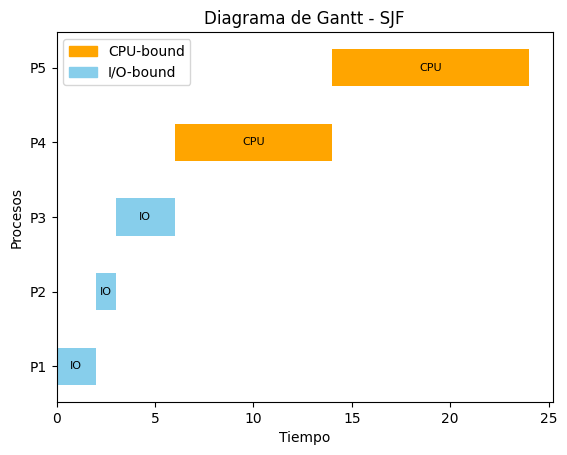

In [ ]:
procesos_exp6 = [
    {"id": "P1", "llegada": 0, "duracion": 2, "tipo": "IO"},
    {"id": "P2", "llegada": 1, "duracion": 1, "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 3, "tipo": "IO"},
    {"id": "P4", "llegada": 3, "duracion": 8, "tipo": "CPU"},
    {"id": "P5", "llegada": 4, "duracion": 10, "tipo": "CPU"},
]
simular_sjf(procesos_exp6)


### Experimento 4 (Sistema aleatorio de procesos)  

,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P2,CPU,0,13,0,13,13,0,0
1,P10,IO,1,1,13,14,13,12,12
2,P12,IO,4,1,14,15,11,10,10
3,P6,IO,2,2,15,17,15,13,13
4,P16,IO,7,2,17,19,12,10,10
5,P3,IO,8,2,19,21,13,11,11
6,P13,IO,2,3,21,24,22,19,19
7,P1,IO,4,3,24,27,23,20,20
8,P7,IO,4,4,27,31,27,23,23
9,P5,IO,7,4,31,35,28,24,24



--- Métricas Globales (SJF correcto) ---
Promedio Retorno:   48.85
Promedio Espera:    41.70
Promedio Respuesta: 41.70
Throughput:         0.14 procesos/unidad tiempo
Equidad (Fairness): 0.08


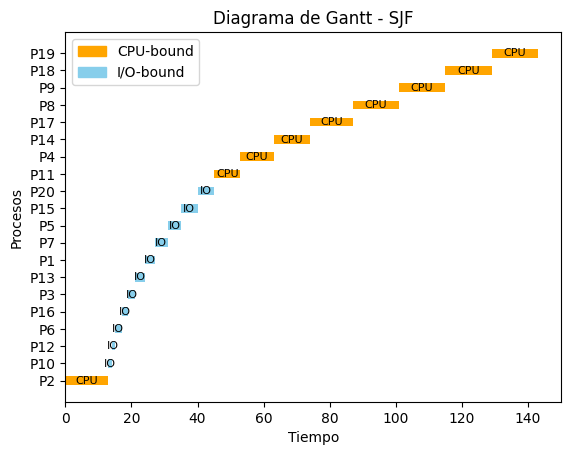

In [ ]:
import random

procesos_random = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 8)
    procesos_random.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

simular_sjf(procesos_random)


## Escenario: Alta concurrencia vs Baja concurrencia
En este escenario se busca analizar cómo el algoritmo SJF (Shortest Job First) maneja una cola de procesos que presentan diferentes concurrencias (alta concurrencia y baja concurrencia).  
Todos los procesos llegan a tiempos distintos, pero tienen duraciones y concurrencias distintas.  
Este tipo de escenario son comunes en sistemas operativos modernos y sistemas con recursos limitados.

### Experimento 1 (Alta concurrencia)  

,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P11,IO,0,1,0,1,1,0,0
1,P10,IO,1,1,1,2,1,0,0
2,P4,IO,0,2,2,4,4,2,2
3,P5,IO,0,3,4,7,7,4,4
4,P14,IO,1,3,7,10,9,6,6
5,P13,IO,2,3,10,13,11,8,8
6,P8,IO,3,3,13,16,13,10,10
7,P12,IO,3,3,16,19,16,13,13
8,P16,IO,1,4,19,23,22,18,18
9,P9,IO,1,5,23,28,27,22,22



--- Métricas Globales (SJF correcto) ---
Promedio Retorno:   40.30
Promedio Espera:    34.05
Promedio Respuesta: 34.05
Throughput:         0.16 procesos/unidad tiempo
Equidad (Fairness): 0.01


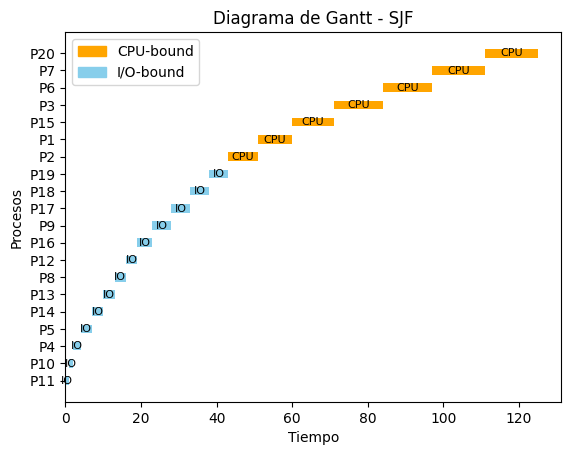

In [ ]:
procesos_exp7 = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 3)
    procesos_exp7.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

simular_sjf(procesos_exp7)

### Experimento 2 (Baja concurrencia)  

,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P12,CPU,1,9,1,10,9,0,0
1,P9,IO,8,2,10,12,4,2,2
2,P2,IO,11,3,12,15,4,1,1
3,P18,CPU,4,10,15,25,21,11,11
4,P20,IO,20,1,25,26,6,5,5
5,P13,IO,17,4,26,30,13,9,9
6,P6,CPU,16,9,30,39,23,14,14
7,P19,IO,33,4,39,43,10,6,6
8,P17,IO,42,1,43,44,2,1,1
9,P8,IO,43,4,44,48,5,1,1



--- Métricas Globales (SJF correcto) ---
Promedio Retorno:   31.60
Promedio Espera:    24.95
Promedio Respuesta: 24.95
Throughput:         0.15 procesos/unidad tiempo
Equidad (Fairness): 0.01


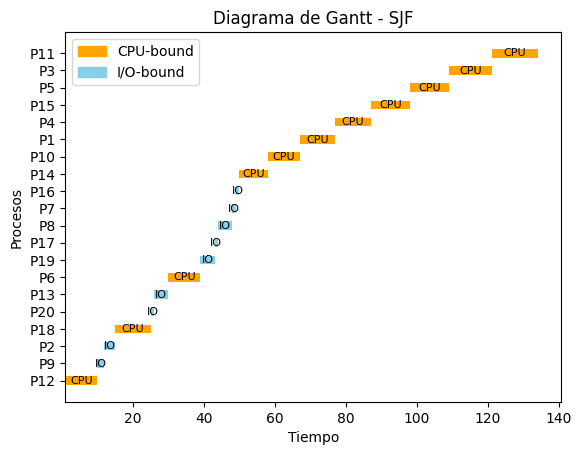

In [ ]:
procesos_exp8 = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 50)
    procesos_exp8.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

simular_sjf(procesos_exp8)

#Algoritmo Round Robin



##Algoritmo Round Robin en Python

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display

def simular_round_robin(procesosPrueba, quantum):
    procesos = [p.copy() for p in procesosPrueba]
    tiempo_actual = 0
    cola = []
    terminados = []
    timeline = []

    for p in procesos:
        p["restante"] = p["duracion"]

    # Bucle principal
    while True:
        # Agregar procesos que llegan en este instante (sin duplicados)
        for p in procesos:
            if (p["llegada"] == tiempo_actual
                and p["restante"] > 0
                and p["id"] not in [proc["id"] for proc in cola]
                and p["id"] not in [proc["id"] for proc in terminados]):
                cola.append(p)

        if cola:
            actual = cola.pop(0)

            if "inicio" not in actual:
                actual["inicio"] = tiempo_actual
                actual["respuesta"] = tiempo_actual - actual["llegada"]

            # Ejecutar durante el quantum o hasta que termine
            ejecucion = min(quantum, actual["restante"])
            inicio = tiempo_actual
            fin = tiempo_actual + ejecucion

            timeline.append({
                "id": actual["id"],
                "inicio": inicio,
                "duracion": ejecucion,
                "tipo": actual.get("tipo", "")
            })

            tiempo_actual = fin
            actual["restante"] -= ejecucion

            # Agregar los procesos que llegan mientras este se ejecuta
            for p in procesos:
                if (inicio < p["llegada"] <= fin
                    and p["id"] not in [proc["id"] for proc in cola]
                    and p["restante"] > 0
                    and p["id"] not in [proc["id"] for proc in terminados]):
                    cola.append(p)

            if actual["restante"] == 0:
                actual["fin"] = tiempo_actual
                actual["retorno"] = actual["fin"] - actual["llegada"]
                actual["espera"] = actual["retorno"] - actual["duracion"]

                if actual["id"] not in [p["id"] for p in terminados]:
                    terminados.append(actual)
            else:
                cola.append(actual)
        else:
            if any(p["restante"] > 0 for p in procesos):
                tiempo_actual += 1
                continue
            else:
                break

    # --- Verificación automática de duplicados ---
    ids = [p["id"] for p in terminados]
    if len(ids) != len(set(ids)):
        print("⚠️  Advertencia: Hay procesos repetidos en la lista de terminados")

    # --- Metricas globales ---
    n = len(terminados)
    promedio_retorno = sum(p["retorno"] for p in terminados) / n
    promedio_espera = sum(p["espera"] for p in terminados) / n
    promedio_respuesta = sum(p["respuesta"] for p in terminados) / n
    throughput = n / tiempo_actual if tiempo_actual > 0 else 0
    min_retorno = min(p["retorno"] for p in terminados)
    max_retorno = max(p["retorno"] for p in terminados)
    fairness = min_retorno / max_retorno if max_retorno > 0 else 0

    # --- Tabla de resultados ---
    tiene_tipo = any("tipo" in p for p in procesosPrueba)
    columnas = ["id", "tipo", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"] if tiene_tipo \
        else ["id", "llegada", "duracion", "inicio", "fin", "retorno", "espera", "respuesta"]
    df = pd.DataFrame(terminados)[columnas]
    display(df.style.set_caption("Resultados del algoritmo Round Robin"))

    print("\n--- Métricas Globales (Round Robin) ---")
    print(f"Quantum:            {quantum}")
    print(f"Promedio Retorno:   {promedio_retorno:.2f}")
    print(f"Promedio Espera:    {promedio_espera:.2f}")
    print(f"Promedio Respuesta: {promedio_respuesta:.2f}")
    print(f"Throughput:         {throughput:.2f} procesos/unidad tiempo")
    print(f"Equidad (Fairness): {fairness:.2f}")

    # --- Diagrama---
    fig, ax = plt.subplots()
    colores_tipo = {"CPU": "orange", "IO": "skyblue"}

    if tiene_tipo:
        tipos_presentes = sorted(set(p["tipo"] for p in procesosPrueba))
        for bloque in timeline:
            color = colores_tipo.get(bloque["tipo"], "lightgray")
            ax.barh(bloque["id"], bloque["duracion"], left=bloque["inicio"], height=0.5, color=color)
        handles = []
        labels = []
        for tipo in tipos_presentes:
            handles.append(plt.Rectangle((0, 0), 1, 1, color=colores_tipo.get(tipo, "lightgray")))
            labels.append("CPU-bound" if tipo == "CPU" else "I/O-bound")
        ax.legend(handles, labels)
    else:
        colores = plt.cm.tab10.colors
        for i, bloque in enumerate(timeline):
            ax.barh(bloque["id"], bloque["duracion"], left=bloque["inicio"], height=0.5, color=colores[i % len(colores)])

    ax.set_xlabel("Tiempo")
    ax.set_ylabel("Procesos")
    ax.set_title(f"Diagrama de Gantt - Round Robin (Quantum={quantum})")
    plt.show()

##Escenario 1: Mezcla de procesos cortos y largos

Se busca observar cómo el algoritmo reparte el tiempo entre procesos de diferente duración.
Round Robin no prioriza los cortos, pero les da a todos turnos iguales, mostrando una buena equidad.

###Experimento 1

Escenario A1 (Mezcla cortos/largos) — quantum=3


,id,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P1,0,2,0,2,2,0,0
1,P4,0,1,8,9,9,8,8
2,P3,0,4,5,16,16,12,5
3,P2,0,8,2,21,21,13,2
4,P5,0,10,9,25,25,15,9



--- Métricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   14.60
Promedio Espera:    9.60
Promedio Respuesta: 4.80
Throughput:         0.20 procesos/unidad tiempo
Equidad (Fairness): 0.08


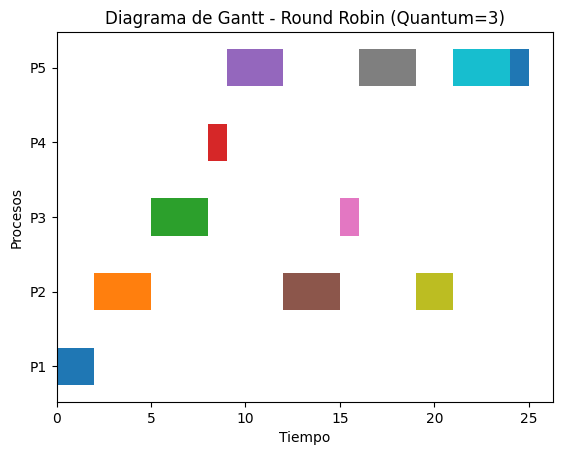

In [ ]:
procesos_exp1 = [
    {"id": "P1", "llegada": 0, "duracion": 2},
    {"id": "P2", "llegada": 0, "duracion": 8},
    {"id": "P3", "llegada": 0, "duracion": 4},
    {"id": "P4", "llegada": 0, "duracion": 1},
    {"id": "P5", "llegada": 0, "duracion": 10},
]
print("Escenario A1 (Mezcla cortos/largos) — quantum=3")
simular_round_robin(procesos_exp1, quantum=3)


###Experimento 2

Escenario A2 (Duraciones variadas) — quantum=3


,id,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P1,0,3,0,3,3,0,0
1,P6,0,8,15,47,47,39,15
2,P4,0,12,9,56,56,44,9
3,P2,0,18,3,71,71,53,3
4,P3,0,26,6,91,91,65,6
5,P5,0,40,12,107,107,67,12



--- Métricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   62.50
Promedio Espera:    44.67
Promedio Respuesta: 7.50
Throughput:         0.06 procesos/unidad tiempo
Equidad (Fairness): 0.03


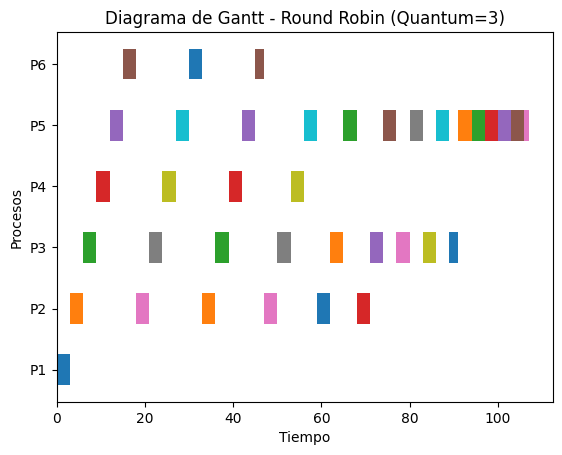

In [ ]:
procesos_exp2 = [
    {"id": "P1", "llegada": 0, "duracion": 3},
    {"id": "P2", "llegada": 0, "duracion": 18},
    {"id": "P3", "llegada": 0, "duracion": 26},
    {"id": "P4", "llegada": 0, "duracion": 12},
    {"id": "P5", "llegada": 0, "duracion": 40},
    {"id": "P6", "llegada": 0, "duracion": 8},
]
print("Escenario A2 (Duraciones variadas) — quantum=3")
simular_round_robin(procesos_exp2, quantum=3)


###Experimento 3

Escenario A3 (Muchos procesos variados) — quantum=3


,id,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P9,0,3,24,27,27,24,24
1,P4,0,5,9,41,41,36,9
2,P2,0,15,3,110,110,95,3
3,P6,0,29,15,223,223,194,15
4,P3,0,38,6,273,273,235,6
5,P7,0,47,18,323,323,276,18
6,P10,0,55,27,363,363,308,27
7,P5,0,61,12,376,376,315,12
8,P1,0,72,0,394,394,322,0
9,P8,0,80,21,405,405,325,21



--- Métricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   253.50
Promedio Espera:    213.00
Promedio Respuesta: 13.50
Throughput:         0.02 procesos/unidad tiempo
Equidad (Fairness): 0.07


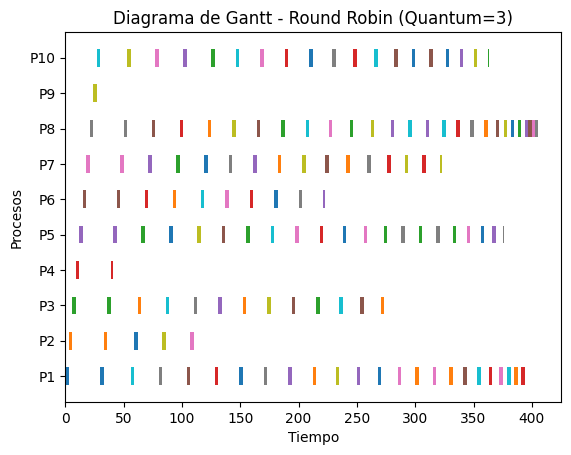

In [ ]:
procesos_exp3 = [
    {"id": "P1", "llegada": 0, "duracion": 72},
    {"id": "P2", "llegada": 0, "duracion": 15},
    {"id": "P3", "llegada": 0, "duracion": 38},
    {"id": "P4", "llegada": 0, "duracion": 5},
    {"id": "P5", "llegada": 0, "duracion": 61},
    {"id": "P6", "llegada": 0, "duracion": 29},
    {"id": "P7", "llegada": 0, "duracion": 47},
    {"id": "P8", "llegada": 0, "duracion": 80},
    {"id": "P9", "llegada": 0, "duracion": 3},
    {"id": "P10","llegada": 0, "duracion": 55},
]
print("Escenario A3 (Muchos procesos variados) — quantum=3")
simular_round_robin(procesos_exp3, quantum=3)


##Escenario 2: CPU-bound vs I/O-bound

Aquí se comparan procesos que usan intensamente la CPU frente a procesos que hacen más I/O (entrada/salida).
Round Robin tiende a equilibrar bien estos casos porque los procesos I/O suelen ceder el CPU antes del quantum completo.


###Experimento 1

Escenario B1 (CPU vs IO, mezcla) — quantum=3


,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P2,IO,1,3,3,6,5,2,2
1,P4,IO,3,2,9,11,8,6,6
2,P5,IO,4,1,14,15,11,10,10
3,P3,CPU,2,8,6,29,27,19,4
4,P1,CPU,0,10,0,30,30,20,0
5,P6,CPU,5,12,15,36,31,19,10



--- Métricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   18.67
Promedio Espera:    12.67
Promedio Respuesta: 5.33
Throughput:         0.17 procesos/unidad tiempo
Equidad (Fairness): 0.16


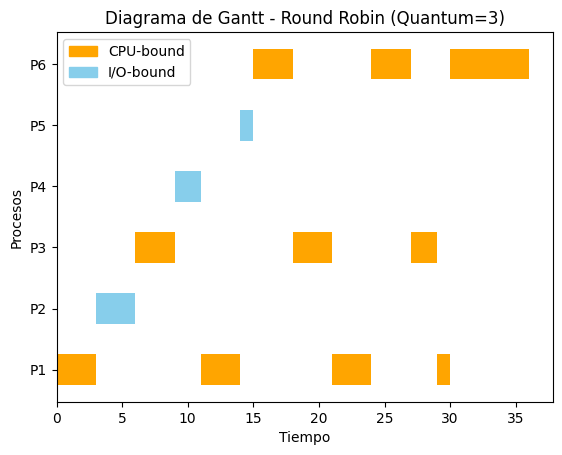

In [ ]:
procesos_exp4 = [
    {"id": "P1", "llegada": 0, "duracion": 10, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 3,  "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 8,  "tipo": "CPU"},
    {"id": "P4", "llegada": 3, "duracion": 2,  "tipo": "IO"},
    {"id": "P5", "llegada": 4, "duracion": 1,  "tipo": "IO"},
    {"id": "P6", "llegada": 5, "duracion": 12, "tipo": "CPU"},
]
print("Escenario B1 (CPU vs IO, mezcla) — quantum=3")
simular_round_robin(procesos_exp4, quantum=3)


###Experimento 2

Escenario B2 (dominancia CPU-bound) — quantum=4


,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P5,IO,6,3,20,23,17,14,14
1,P1,CPU,0,12,0,39,39,27,0
2,P3,CPU,3,10,8,45,42,32,5
3,P4,CPU,4,9,12,46,42,33,8
4,P2,CPU,1,15,4,49,48,33,3



--- Métricas Globales (Round Robin) ---
Quantum:            4
Promedio Retorno:   37.60
Promedio Espera:    27.80
Promedio Respuesta: 6.00
Throughput:         0.10 procesos/unidad tiempo
Equidad (Fairness): 0.35


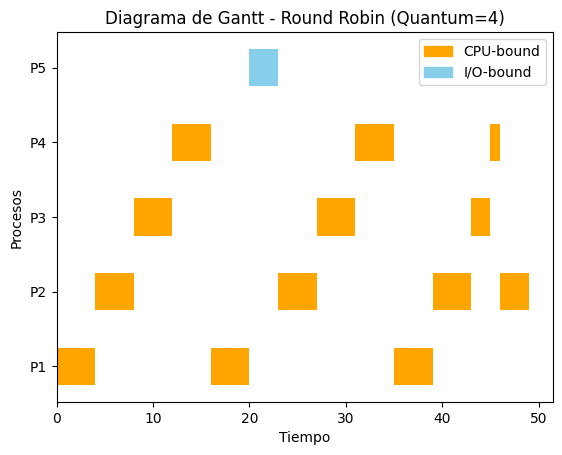

In [ ]:
procesos_exp5 = [
    {"id": "P1", "llegada": 0, "duracion": 12, "tipo": "CPU"},
    {"id": "P2", "llegada": 1, "duracion": 15, "tipo": "CPU"},
    {"id": "P3", "llegada": 3, "duracion": 10, "tipo": "CPU"},
    {"id": "P4", "llegada": 4, "duracion": 9,  "tipo": "CPU"},
    {"id": "P5", "llegada": 6, "duracion": 3,  "tipo": "IO"},
]
print("Escenario B2 (dominancia CPU-bound) — quantum=4")
simular_round_robin(procesos_exp5, quantum=4)


###Experimento 3

Escenario B3 (dominancia I/O-bound) — quantum=3


,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P1,IO,0,2,0,2,2,0,0
1,P2,IO,1,1,2,3,2,1,1
2,P3,IO,2,3,3,6,4,1,1
3,P4,CPU,3,8,6,20,17,9,3
4,P5,CPU,4,10,9,24,20,10,5



--- Métricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   9.00
Promedio Espera:    4.20
Promedio Respuesta: 2.00
Throughput:         0.21 procesos/unidad tiempo
Equidad (Fairness): 0.10


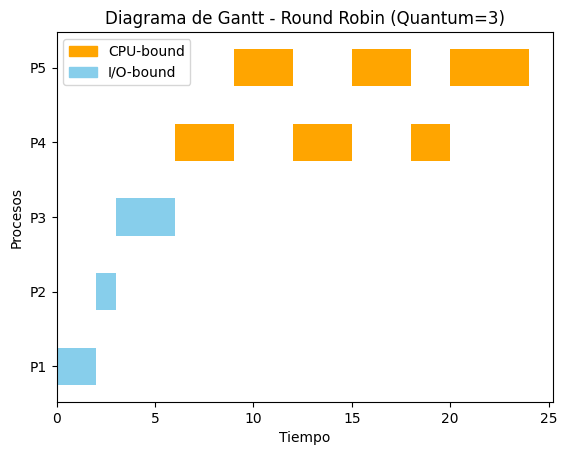

In [ ]:
procesos_exp6 = [
    {"id": "P1", "llegada": 0, "duracion": 2, "tipo": "IO"},
    {"id": "P2", "llegada": 1, "duracion": 1, "tipo": "IO"},
    {"id": "P3", "llegada": 2, "duracion": 3, "tipo": "IO"},
    {"id": "P4", "llegada": 3, "duracion": 8, "tipo": "CPU"},
    {"id": "P5", "llegada": 4, "duracion": 10, "tipo": "CPU"},
]
print("Escenario B3 (dominancia I/O-bound) — quantum=3")
simular_round_robin(procesos_exp6, quantum=3)


###Experimento 4

Escenario B4 (aleatorio CPU/IO) — quantum=3


,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P1,IO,0,4,0,25,25,21,0
1,P19,IO,4,1,34,35,31,30,30
2,P4,IO,3,5,3,37,34,29,0
3,P3,IO,7,3,40,43,36,33,33
4,P12,IO,8,1,52,53,45,44,44
5,P20,IO,8,1,56,57,49,48,48
6,P10,IO,3,5,12,65,62,57,9
7,P2,IO,7,5,37,85,78,73,30
8,P11,IO,8,4,49,92,84,80,41
9,P13,CPU,6,9,28,116,110,101,22



--- Métricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   102.30
Promedio Espera:    93.95
Promedio Respuesta: 24.10
Throughput:         0.12 procesos/unidad tiempo
Equidad (Fairness): 0.16


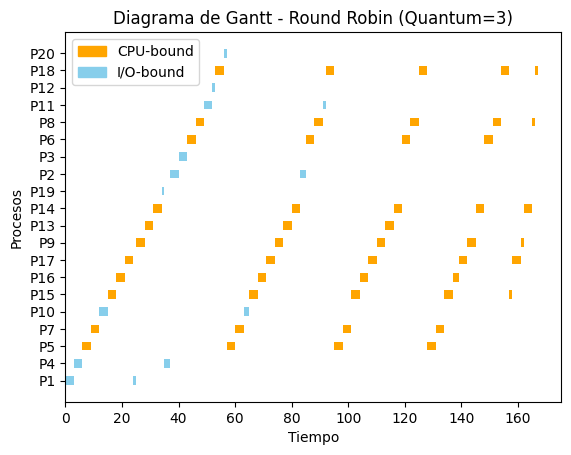

In [ ]:
import random
random.seed(0)  # fija semilla para reproducibilidad

procesos_random = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 8)
    procesos_random.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

print("Escenario B4 (aleatorio CPU/IO) — quantum=3")
simular_round_robin(procesos_random, quantum=3)


##Escenario 3: Alta concurrencia vs Baja concurrencia

#Alta
Se simulan varios procesos llegando casi juntos.
Round Robin mantiene buena equidad pero aumenta la espera promedio si el quantum es pequeño.

#Baja
Aquí cada proceso tiene tiempo de ejecutarse sin mucha competencia.
El resultado se parece al FCFS, pero aún mantiene la estructura por turnos.

###Experimento 1

Escenario C1 (Alta concurrencia) — quantum=2


,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P12,IO,1,2,22,24,23,21,21
1,P9,IO,3,2,34,36,33,31,31
2,P5,IO,0,4,2,44,44,40,2
3,P13,IO,0,3,8,49,49,46,8
4,P3,IO,1,4,16,57,56,52,15
5,P6,IO,1,3,18,58,57,54,17
6,P20,IO,1,4,28,66,65,61,27
7,P14,IO,0,5,10,81,81,76,10
8,P11,IO,1,5,20,86,85,80,19
9,P16,IO,3,5,38,97,94,89,35



--- Métricas Globales (Round Robin) ---
Quantum:            2
Promedio Retorno:   95.30
Promedio Espera:    87.70
Promedio Respuesta: 18.25
Throughput:         0.13 procesos/unidad tiempo
Equidad (Fairness): 0.15


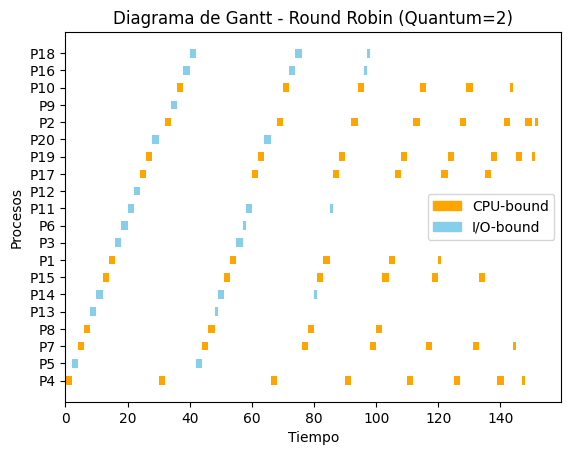

In [ ]:
import random
random.seed(1)

procesos_exp7 = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 3)
    procesos_exp7.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

print("Escenario C1 (Alta concurrencia) — quantum=2")
simular_round_robin(procesos_exp7, quantum=2)


###Experimento 2

Escenario C2 (Baja concurrencia) — quantum=3


,id,tipo,llegada,duracion,inicio,fin,retorno,espera,respuesta
0,P1,CPU,5,9,5,20,15,6,0
1,P10,IO,10,5,11,25,15,10,1
2,P18,IO,10,4,14,32,22,18,4
3,P9,IO,24,3,47,50,26,23,23
4,P7,IO,17,5,25,52,35,30,8
5,P3,IO,38,3,61,64,26,23,23
6,P6,IO,23,5,35,69,46,41,12
7,P17,IO,22,5,41,83,61,56,19
8,P2,IO,47,2,83,85,38,36,36
9,P19,IO,41,4,72,110,69,65,31



--- Métricas Globales (Round Robin) ---
Quantum:            3
Promedio Retorno:   66.40
Promedio Espera:    59.10
Promedio Respuesta: 19.80
Throughput:         0.13 procesos/unidad tiempo
Equidad (Fairness): 0.12


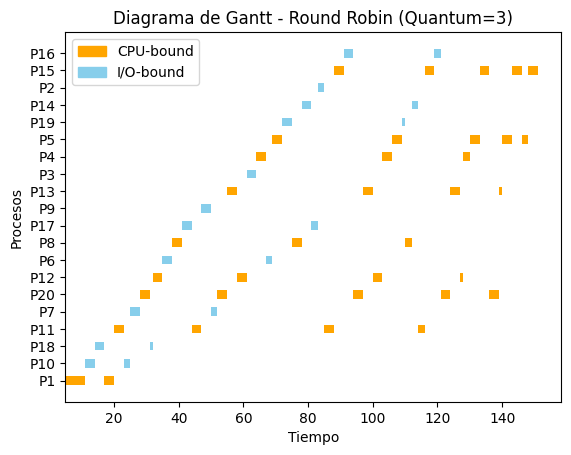

In [ ]:
random.seed(2)

procesos_exp8 = []
for i in range(20):
    tipo = random.choice(["CPU", "IO"])
    duracion = random.randint(8, 15) if tipo == "CPU" else random.randint(1, 5)
    llegada = random.randint(0, 50)
    procesos_exp8.append({"id": f"P{i+1}", "llegada": llegada, "duracion": duracion, "tipo": tipo})

print("Escenario C2 (Baja concurrencia) — quantum=3")
simular_round_robin(procesos_exp8, quantum=3)


#Algoritmo de M y H





```
# Esto tiene formato de código
```

Algoritmo de Prioridad Estatica y Dinamica
*texto en cursiva*

> Agregar bloque entrecomillado



Algoritmo de Prioridad Estatica y Dinamica # Sección nueva

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import sys
import copy
import numpy as np

# --- 1. CLASE DEL PROCESO ---
class Proceso:
    def __init__(self, pid, llegada, rafaga, prioridad_estatica):
        self.pid = pid
        self.llegada = llegada
        self.rafaga = rafaga
        self.prioridad_estatica = prioridad_estatica
        self.prioridad_dinamica = prioridad_estatica
        self.tiempo_restante = rafaga
        self.tiempo_inicio = -1
        self.tiempo_finalizacion = 0
        self.tiempo_espera = 0

    def __repr__(self):
        return f"[PID: {self.pid}, Prioridad: {self.prioridad_dinamica}]"

# --- 2. LÓGICA DE SELECCIÓN ---
def seleccionar_proceso_con_mayor_prioridad(cola_listos, tipo_algoritmo):
    if not cola_listos:
        return None
    proceso_elegido = cola_listos[0]
    if tipo_algoritmo == 'estatica':
        for p in cola_listos:
            if p.prioridad_estatica < proceso_elegido.prioridad_estatica:
                proceso_elegido = p
    elif tipo_algoritmo == 'dinamica':
        for p in cola_listos:
            if p.prioridad_dinamica < proceso_elegido.prioridad_dinamica:
                proceso_elegido = p
    return proceso_elegido

# --- 3. LÓGICA DE ENVEJECIMIENTO ---
def envejecer_procesos_en_espera(cola_listos, factor_envejecimiento=1):
    for p in cola_listos:
        p.prioridad_dinamica = max(0, p.prioridad_dinamica - factor_envejecimiento)

# --- 4. SIMULADOR PRINCIPAL ---
def simular_planificacion(lista_procesos_inicial, tipo_algoritmo):
    procesos = copy.deepcopy(lista_procesos_inicial)
    tiempo_actual = 0
    cola_listos = []
    procesos_terminados = []
    proceso_en_ejecucion = None
    procesos_por_llegar = sorted(procesos, key=lambda p: p.llegada)

    while procesos_por_llegar or cola_listos or proceso_en_ejecucion:

        # 1. Llegada de nuevos procesos
        while procesos_por_llegar and procesos_por_llegar[0].llegada <= tiempo_actual:
            cola_listos.append(procesos_por_llegar.pop(0))

        # 2. Selección del mejor candidato DE LA COLA
        proceso_elegido_de_cola = seleccionar_proceso_con_mayor_prioridad(cola_listos, tipo_algoritmo)

        # 3. Lógica de Decisión (CPU Scheduler)
        if proceso_en_ejecucion:
            if proceso_elegido_de_cola:
                mejor_en_cola = False
                if tipo_algoritmo == 'estatica':
                    if proceso_elegido_de_cola.prioridad_estatica < proceso_en_ejecucion.prioridad_estatica:
                        mejor_en_cola = True
                elif tipo_algoritmo == 'dinamica':
                     if proceso_elegido_de_cola.prioridad_dinamica < proceso_en_ejecucion.prioridad_dinamica:
                        mejor_en_cola = True

                if mejor_en_cola:
                    # --- ¡PREEMPTION (APROPIACIÓN)! ---
                    cola_listos.append(proceso_en_ejecucion)
                    proceso_en_ejecucion = proceso_elegido_de_cola
                    cola_listos.remove(proceso_elegido_de_cola)
                    if proceso_en_ejecucion.tiempo_inicio == -1:
                        proceso_en_ejecucion.tiempo_inicio = tiempo_actual

        elif proceso_elegido_de_cola:
            # --- ASIGNACIÓN NORMAL ---
            proceso_en_ejecucion = proceso_elegido_de_cola
            cola_listos.remove(proceso_elegido_de_cola)
            if proceso_en_ejecucion.tiempo_inicio == -1:
                proceso_en_ejecucion.tiempo_inicio = tiempo_actual

        # 6. Ejecutar el tick del proceso en CPU
        if proceso_en_ejecucion:
            proceso_en_ejecucion.tiempo_restante -= 1

            # 7. Comprobar si el proceso terminó
            if proceso_en_ejecucion.tiempo_restante == 0:
                proceso_en_ejecucion.tiempo_finalizacion = tiempo_actual + 1
                procesos_terminados.append(proceso_en_ejecucion)
                proceso_en_ejecucion = None # El CPU queda libre

        # --- BLOQUES MOVIDOS AL FINAL ---

        # 4. Actualizar Tiempos de Espera (NUEVA UBICACIÓN)
        for p in cola_listos:
            p.tiempo_espera += 1

        # 5. Envejecimiento (NUEVA UBICACIÓN)
        if tipo_algoritmo == 'dinamica' and cola_listos:
            envejecer_procesos_en_espera(cola_listos)

        # --- FIN DE BLOQUES MOVIDOS ---

        # 8. Avanzar el reloj
        tiempo_actual += 1
        if tiempo_actual > 1000:
            print("Simulación abortada (límite de 1000 ticks)")
            break

    return procesos_terminados

# --- 5. FUNCIÓN AUXILIAR PARA CREAR PROCESOS ---
def crear_lista_procesos_desde_dict(lista_dicts):
    lista_procesos = []
    for p_dict in lista_dicts:
        lista_procesos.append(
            Proceso(
                pid=p_dict["id"],
                llegada=p_dict["llegada"],
                rafaga=p_dict["duracion"],
                prioridad_estatica=p_dict["prioridad"]
            )
        )
    return lista_procesos

# --- 6. GRAFICAR RESULTADOS ---
def generar_grafico_escenario(titulo_escenario, procesos_est, procesos_din):
    import matplotlib.patches as mpatches

    # --- Preparar datos ---
    procesos_est.sort(key=lambda p: p.pid)
    procesos_din.sort(key=lambda p: p.pid)

    pids = [p.pid for p in procesos_est]
    espera_est = [p.tiempo_espera for p in procesos_est]
    espera_din = [p.tiempo_espera for p in procesos_din]
    retorno_est = [p.tiempo_finalizacion - p.llegada for p in procesos_est]
    retorno_din = [p.tiempo_finalizacion - p.llegada for p in procesos_din]

    n = len(pids)
    indices = np.arange(n)
    ancho_barra = 0.35

    # --- Paleta de colores (tipo Round Robin) ---
    colores = plt.cm.tab10.colors
    color_est = colores[0]  # Azul suave
    color_din = colores[1]  # Naranja suave

    # --- Crear figura con estilo ---
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
    fig.suptitle(titulo_escenario, fontsize=14, fontweight='bold', color="#333333")
    plt.subplots_adjust(hspace=0.3)

    # --- Estilo global ---
    for ax in (ax1, ax2):
        ax.set_facecolor("#f9f9f9")
        ax.grid(axis='y', linestyle='--', alpha=0.4)
        ax.tick_params(axis='x', labelrotation=0)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # --- Subplot 1: Tiempo de Espera ---
    ax1.bar(indices - ancho_barra/2, espera_est, ancho_barra,
            label='Estática', color=color_est, edgecolor='black', alpha=0.9)
    ax1.bar(indices + ancho_barra/2, espera_din, ancho_barra,
            label='Dinámica', color=color_din, edgecolor='black', alpha=0.9)

    for i, val in enumerate(espera_est):
        ax1.text(indices[i] - ancho_barra/2, val + 0.1, str(val),
                 ha='center', va='bottom', fontsize=8, color="#333333", fontweight='bold')
    for i, val in enumerate(espera_din):
        ax1.text(indices[i] + ancho_barra/2, val + 0.1, str(val),
                 ha='center', va='bottom', fontsize=8, color="#333333", fontweight='bold')

    ax1.set_title(" Tiempo de Espera por Proceso", fontsize=12, fontweight="bold")
    ax1.set_ylabel("Ticks de Espera", fontsize=10)
    ax1.set_xticks(indices)
    ax1.set_xticklabels(pids, fontsize=9)
    ax1.legend(frameon=False)

    # --- Subplot 2: Tiempo de Retorno ---
    ax2.bar(indices - ancho_barra/2, retorno_est, ancho_barra,
            label='Estática', color=color_est, edgecolor='black', alpha=0.9)
    ax2.bar(indices + ancho_barra/2, retorno_din, ancho_barra,
            label='Dinámica', color=color_din, edgecolor='black', alpha=0.9)

    for i, val in enumerate(retorno_est):
        ax2.text(indices[i] - ancho_barra/2, val + 0.1, str(val),
                 ha='center', va='bottom', fontsize=8, color="#333333", fontweight='bold')
    for i, val in enumerate(retorno_din):
        ax2.text(indices[i] + ancho_barra/2, val + 0.1, str(val),
                 ha='center', va='bottom', fontsize=8, color="#333333", fontweight='bold')

    ax2.set_title(" Tiempo de Retorno (Turnaround)", fontsize=12, fontweight="bold")
    ax2.set_ylabel("Ticks Totales", fontsize=10)
    ax2.set_xticks(indices)
    ax2.set_xticklabels(pids, fontsize=9)
    ax2.legend(frameon=False)

    # --- Leyenda superior ---
    patches = [
        mpatches.Patch(color=color_est, label="Estática"),
        mpatches.Patch(color=color_din, label="Dinámica")
    ]
    fig.legend(handles=patches, loc='upper right', frameon=False, fontsize=9)

    plt.tight_layout()
    plt.show()


# --- 7. MOSTRAR TABLA ---
def mostrar_tabla_resultados(procesos, titulo):
    data = {
        "PID": [p.pid for p in procesos],
        "Llegada": [p.llegada for p in procesos],
        "Duración": [p.rafaga for p in procesos],
        "Prioridad Estática": [p.prioridad_estatica for p in procesos],
        "Inicio": [p.tiempo_inicio for p in procesos],
        "Finalización": [p.tiempo_finalizacion for p in procesos],
        "Espera": [p.tiempo_espera for p in procesos],
        "Retorno": [p.tiempo_finalizacion - p.llegada for p in procesos]
    }
    df = pd.DataFrame(data)
    print(f"\n {titulo}")
    display(df)
    return df

print("Simulador de planificación cargado correctamente.")




Simulador de planificación cargado correctamente.


## Escenario: Conflicto (Prioridad vs. Duración)
Ver qué pasa cuando la prioridad de un proceso es inversa a su duración (procesos largos tienen alta prioridad y procesos cortos tienen baja prioridad).

### Experimento 1 (Conflicto Extremo)  

Un proceso muy largo (P5) tiene la mejor prioridad, y uno muy corto (P4) tiene la peor. Todos llegan al mismo tiempo. Qué observar: La Estática será muy ineficiente (P4 espera una eternidad). La Dinámica debería "salvar" a P4 haciendo que su prioridad aumente rápidamente.

/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


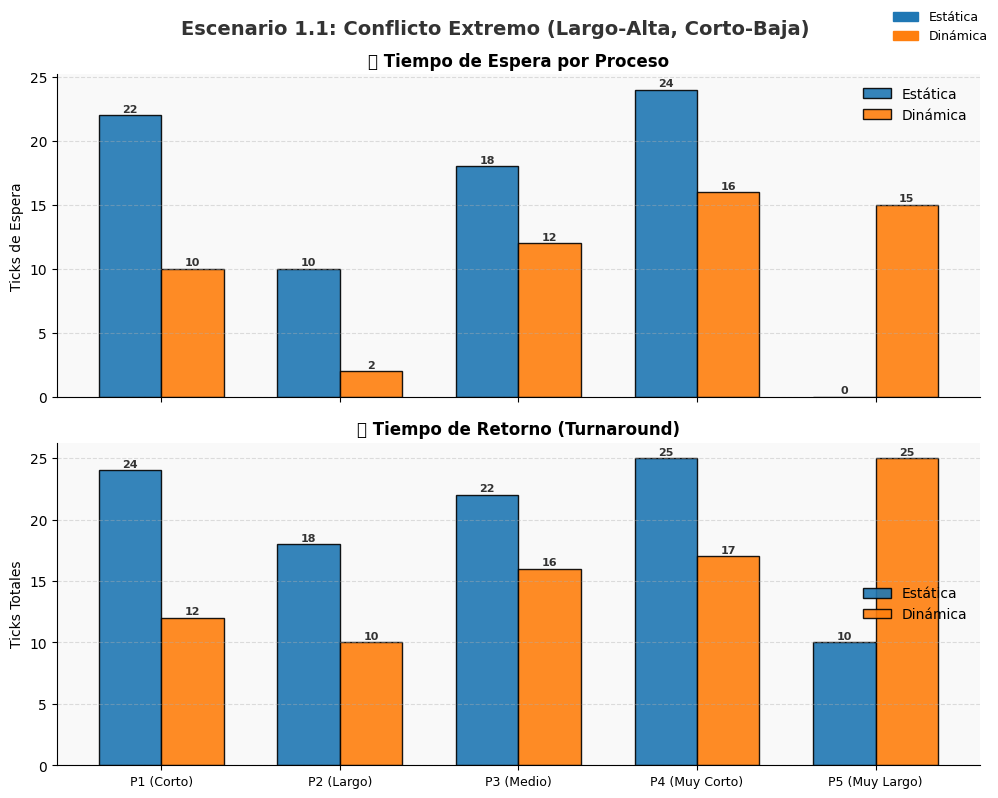


📋 Resultados: Prioridad Estática (1.1)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Corto),0,2,4,22,24,22,24
1,P2 (Largo),0,8,2,10,18,10,18
2,P3 (Medio),0,4,3,18,22,18,22
3,P4 (Muy Corto),0,1,5,24,25,24,25
4,P5 (Muy Largo),0,10,1,0,10,0,10



📋 Resultados: Prioridad Dinámica (1.1)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Corto),0,2,4,10,12,10,12
1,P2 (Largo),0,8,2,2,10,2,10
2,P3 (Medio),0,4,3,12,16,12,16
3,P4 (Muy Corto),0,1,5,16,17,16,17
4,P5 (Muy Largo),0,10,1,0,25,15,25


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Corto),0,2,4,10,12,10,12
1,P2 (Largo),0,8,2,2,10,2,10
2,P3 (Medio),0,4,3,12,16,12,16
3,P4 (Muy Corto),0,1,5,16,17,16,17
4,P5 (Muy Largo),0,10,1,0,25,15,25


In [ ]:
# --- 1.1 Definición del Experimento ---
titulo_1_1 = "Escenario 1.1: Conflicto Extremo (Largo-Alta, Corto-Baja)"
procesos_1_1 = [
    {"id": "P1 (Corto)", "llegada": 0, "duracion": 2, "prioridad": 4},
    {"id": "P2 (Largo)", "llegada": 0, "duracion": 8, "prioridad": 2},
    {"id": "P3 (Medio)", "llegada": 0, "duracion": 4, "prioridad": 3},
    {"id": "P4 (Muy Corto)","llegada": 0, "duracion": 1, "prioridad": 5}, # <-- Peor prioridad
    {"id": "P5 (Muy Largo)","llegada": 0, "duracion": 10,"prioridad": 1}, # <-- Mejor prioridad
]

# --- Simulación ---
lista_obj_1_est = crear_lista_procesos_desde_dict(procesos_1_1)
lista_obj_1_din = crear_lista_procesos_desde_dict(procesos_1_1)

res_est_1 = simular_planificacion(lista_obj_1_est, 'estatica')
res_din_1 = simular_planificacion(lista_obj_1_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_1_1, res_est_1, res_din_1)
mostrar_tabla_resultados(res_est_1, "Resultados: Prioridad Estática (1.1)")
mostrar_tabla_resultados(res_din_1, "Resultados: Prioridad Dinámica (1.1)")

### Experimento 2 (Armonía (Control))  

La prioridad está alineada con la duración. Qué observar: Ambos algoritmos, Estática y Dinámica, deberían comportarse de manera muy similar y ser muy eficientes. El envejecimiento (aging) de la dinámica apenas actuará.

/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


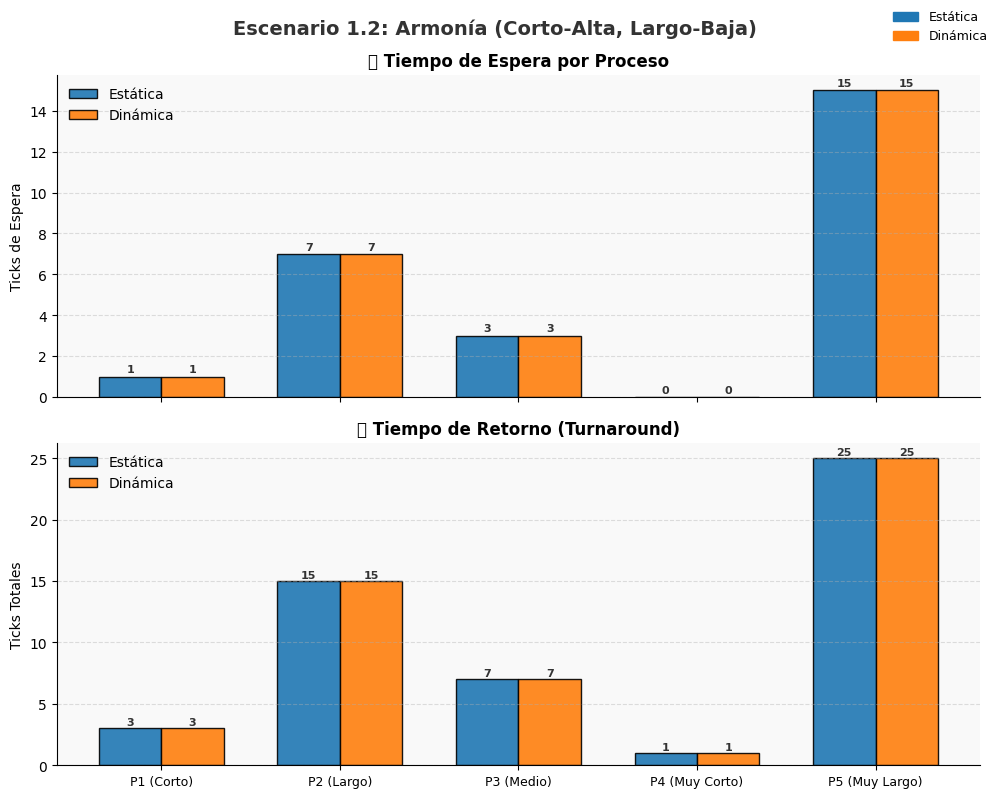


📋 Resultados: Prioridad Estática (1.2)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Corto),0,2,2,1,3,1,3
1,P2 (Largo),0,8,4,7,15,7,15
2,P3 (Medio),0,4,3,3,7,3,7
3,P4 (Muy Corto),0,1,1,0,1,0,1
4,P5 (Muy Largo),0,10,5,15,25,15,25



📋 Resultados: Prioridad Dinámica (1.2)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Corto),0,2,2,1,3,1,3
1,P2 (Largo),0,8,4,7,15,7,15
2,P3 (Medio),0,4,3,3,7,3,7
3,P4 (Muy Corto),0,1,1,0,1,0,1
4,P5 (Muy Largo),0,10,5,15,25,15,25


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Corto),0,2,2,1,3,1,3
1,P2 (Largo),0,8,4,7,15,7,15
2,P3 (Medio),0,4,3,3,7,3,7
3,P4 (Muy Corto),0,1,1,0,1,0,1
4,P5 (Muy Largo),0,10,5,15,25,15,25


In [ ]:
# --- 1.2 Definición del Experimento ---
titulo_1_2 = "Escenario 1.2: Armonía (Corto-Alta, Largo-Baja)"
procesos_1_2 = [
    {"id": "P1 (Corto)", "llegada": 0, "duracion": 2, "prioridad": 2},
    {"id": "P2 (Largo)", "llegada": 0, "duracion": 8, "prioridad": 4},
    {"id": "P3 (Medio)", "llegada": 0, "duracion": 4, "prioridad": 3},
    {"id": "P4 (Muy Corto)","llegada": 0, "duracion": 1, "prioridad": 1}, # <-- Mejor prioridad
    {"id": "P5 (Muy Largo)","llegada": 0, "duracion": 10,"prioridad": 5}, # <-- Peor prioridad
]

# --- Simulación ---
lista_obj_2_est = crear_lista_procesos_desde_dict(procesos_1_2)
lista_obj_2_din = crear_lista_procesos_desde_dict(procesos_1_2)

res_est_2 = simular_planificacion(lista_obj_2_est, 'estatica')
res_din_2 = simular_planificacion(lista_obj_2_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_1_2, res_est_2, res_din_2)
mostrar_tabla_resultados(res_est_2, "Resultados: Prioridad Estática (1.2)")
mostrar_tabla_resultados(res_din_2, "Resultados: Prioridad Dinámica (1.2)")

### Experimento 3 (Conflicto Mixto)  

Un escenario más realista. Las prioridades y duraciones están mezcladas aleatoriamente. Qué observar: La Estática simplemente seguirá el orden 1, 2, 3, 4, 5. La Dinámica mostrará un reordenamiento interesante; P3 (corto, baja prioridad) probablemente "envejecerá" y se ejecutará antes que P4 (largo, prioridad media).

/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


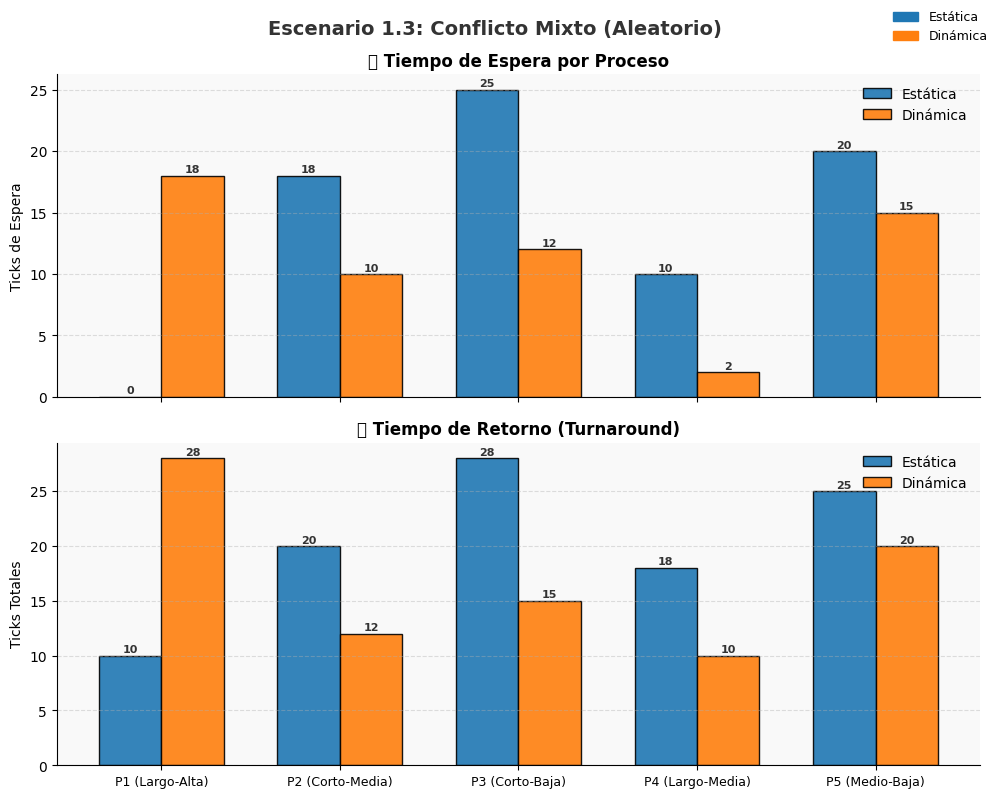


📋 Resultados: Prioridad Estática (1.3)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Largo-Alta),0,10,1,0,10,0,10
1,P2 (Corto-Media),0,2,3,18,20,18,20
2,P3 (Corto-Baja),0,3,5,25,28,25,28
3,P4 (Largo-Media),0,8,2,10,18,10,18
4,P5 (Medio-Baja),0,5,4,20,25,20,25



📋 Resultados: Prioridad Dinámica (1.3)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Largo-Alta),0,10,1,0,28,18,28
1,P2 (Corto-Media),0,2,3,10,12,10,12
2,P3 (Corto-Baja),0,3,5,12,15,12,15
3,P4 (Largo-Media),0,8,2,2,10,2,10
4,P5 (Medio-Baja),0,5,4,15,20,15,20


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Largo-Alta),0,10,1,0,28,18,28
1,P2 (Corto-Media),0,2,3,10,12,10,12
2,P3 (Corto-Baja),0,3,5,12,15,12,15
3,P4 (Largo-Media),0,8,2,2,10,2,10
4,P5 (Medio-Baja),0,5,4,15,20,15,20


In [ ]:
# --- 1.3 Definición del Experimento ---
titulo_1_3 = "Escenario 1.3: Conflicto Mixto (Aleatorio)"
procesos_1_3 = [
    {"id": "P1 (Largo-Alta)", "llegada": 0, "duracion": 10, "prioridad": 1},
    {"id": "P2 (Corto-Media)","llegada": 0, "duracion": 2,  "prioridad": 3},
    {"id": "P3 (Corto-Baja)", "llegada": 0, "duracion": 3,  "prioridad": 5},
    {"id": "P4 (Largo-Media)", "llegada": 0, "duracion": 8,  "prioridad": 2},
    {"id": "P5 (Medio-Baja)", "llegada": 0, "duracion": 5,  "prioridad": 4},
]

# --- Simulación ---
lista_obj_3_est = crear_lista_procesos_desde_dict(procesos_1_3)
lista_obj_3_din = crear_lista_procesos_desde_dict(procesos_1_3)

res_est_3 = simular_planificacion(lista_obj_3_est, 'estatica')
res_din_3 = simular_planificacion(lista_obj_3_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_1_3, res_est_3, res_din_3)
mostrar_tabla_resultados(res_est_3, "Resultados: Prioridad Estática (1.3)")
mostrar_tabla_resultados(res_din_3, "Resultados: Prioridad Dinámica (1.3)")

## Escenario: CPU-bound vs. I/O-bound
Probar el caso de uso clásico: un proceso largo de baja prioridad (CPU-bound) debe ser interrumpido por procesos cortos de alta prioridad (I/O-bound).

### Experimento 1 ("Bombardeo" de I/O (Alta Frecuencia))  

¿Qué pasa si el sistema es bombardeado con muchos procesos de I/O muy seguidos?

Qué observar:

Estática (Azul): Seguirá funcionando bien. CPU-Largo simplemente correrá en los pequeños huecos que dejen los procesos de I/O.

Dinámica (Naranja): Aquí la dinámica puede fallar. CPU-Largo (Pri 5) pasará tanto tiempo esperando que "envejecerá" muy rápido y su prioridad subirá a 0. Esto causará que compita con los procesos de I/O, lo cual es indeseable y arruina el propósito del sistema.

/tmp/ipython-input-4078093743.py:425: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4078093743.py:425: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


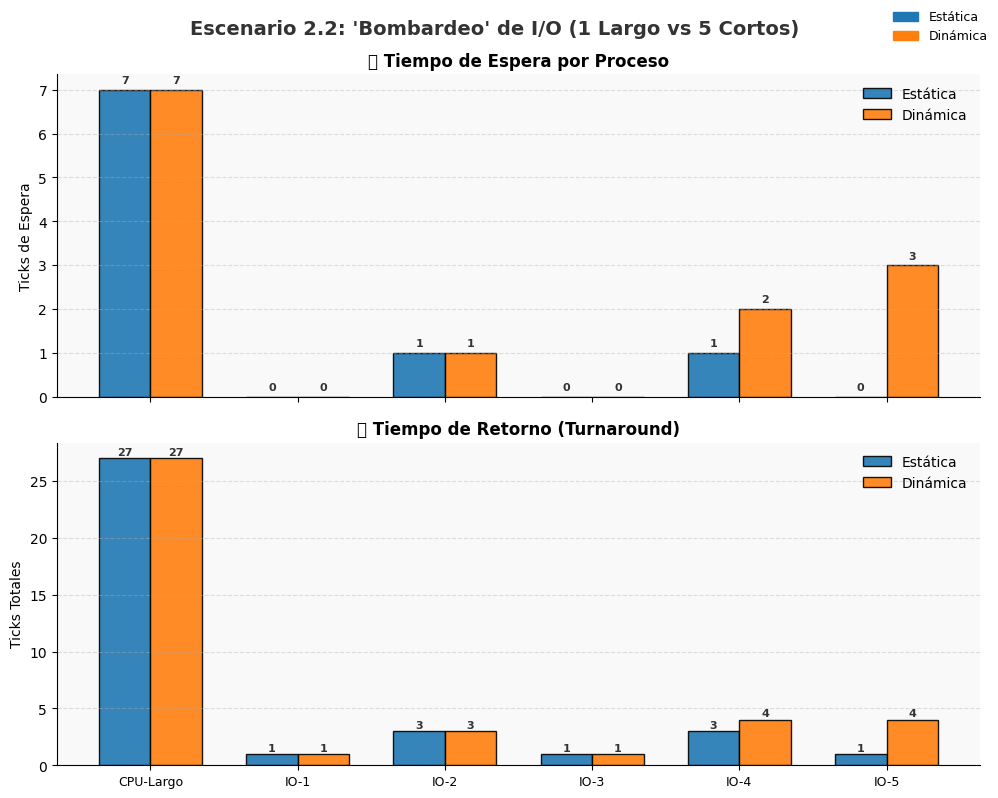


📋 Resultados: Prioridad Estática (2.2)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,CPU-Largo,0,20,5,0,27,7,27
1,IO-1,2,1,1,2,3,0,1
2,IO-2,3,2,2,3,6,1,3
3,IO-3,4,1,1,4,5,0,1
4,IO-4,6,2,2,6,9,1,3
5,IO-5,7,1,1,7,8,0,1



📋 Resultados: Prioridad Dinámica (2.2)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,CPU-Largo,0,20,5,0,27,7,27
1,IO-1,2,1,1,2,3,0,1
2,IO-2,3,2,2,3,6,1,3
3,IO-3,4,1,1,4,5,0,1
4,IO-4,6,2,2,8,10,2,4
5,IO-5,7,1,1,10,11,3,4


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,CPU-Largo,0,20,5,0,27,7,27
1,IO-1,2,1,1,2,3,0,1
2,IO-2,3,2,2,3,6,1,3
3,IO-3,4,1,1,4,5,0,1
4,IO-4,6,2,2,8,10,2,4
5,IO-5,7,1,1,10,11,3,4


In [ ]:
# --- 2.2 Definición del Experimento ---
titulo_2_2 = "Escenario 2.2: 'Bombardeo' de I/O (1 Largo vs 5 Cortos)"
procesos_2_2 = [
    {"id": "CPU-Largo", "llegada": 0, "duracion": 20, "prioridad": 5},

    # Flujo de I/O muy denso
    {"id": "IO-1",      "llegada": 2, "duracion": 1,  "prioridad": 1},
    {"id": "IO-2",      "llegada": 3, "duracion": 2,  "prioridad": 2},
    {"id": "IO-3",      "llegada": 4, "duracion": 1,  "prioridad": 1},
    {"id": "IO-4",      "llegada": 6, "duracion": 2,  "prioridad": 2},
    {"id": "IO-5",      "llegada": 7, "duracion": 1,  "prioridad": 1},
]

# --- Simulación ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_2_2)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_2_2)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_2_2, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Estática (2.2)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Dinámica (2.2)")

### Experimento 2 (Brecha de Prioridad Pequeña)  

¿Qué pasa si los procesos de I/O son solo un poco más importantes que el de CPU?.

Qué observar:

Estática (Azul): Funcionará perfectamente. 2 sigue siendo mejor que 3.

Dinámica (Naranja): El sistema colapsará. CPU-Largo (Pri 3) solo necesita "envejecer" 1 tick (mientras IO-1 corre) para pasar a Prioridad 2. Empezará a empatar y competir con los procesos de I/O, haciendo que esperen mucho.

/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1439563788.py:218: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


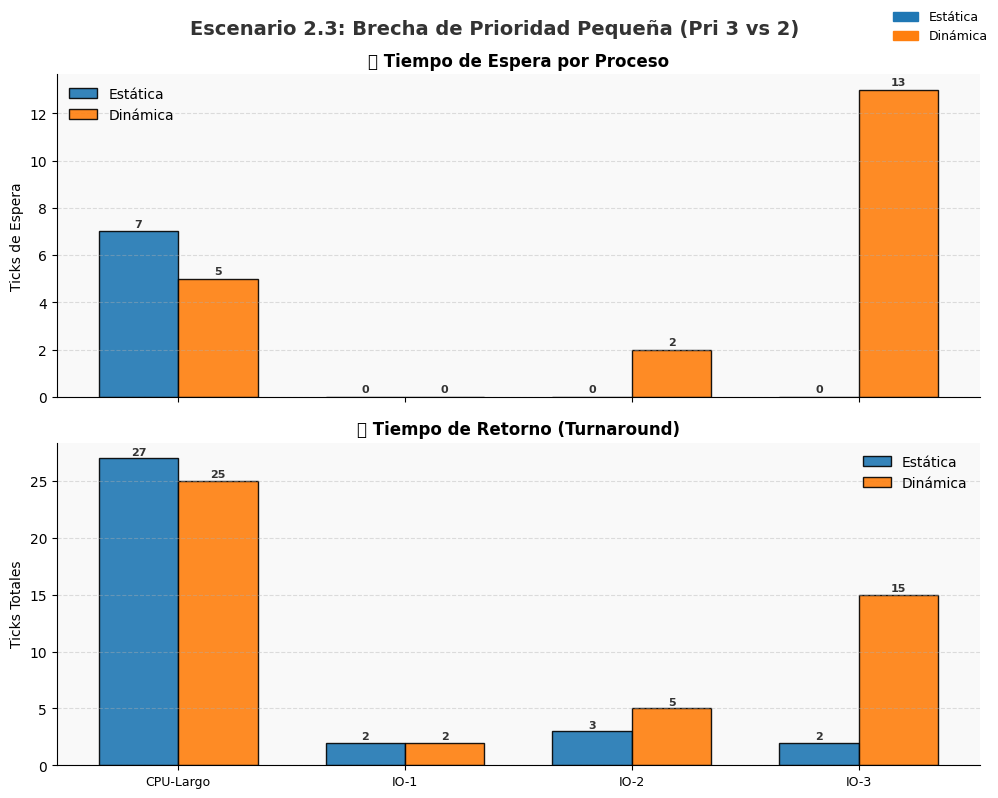


📋 Resultados: Prioridad Estática (2.3)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,CPU-Largo,0,20,3,0,27,7,27
1,IO-1,3,2,2,3,5,0,2
2,IO-2,7,3,2,7,10,0,3
3,IO-3,12,2,1,12,14,0,2



📋 Resultados: Prioridad Dinámica (2.3)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,CPU-Largo,0,20,3,0,25,5,25
1,IO-1,3,2,2,3,5,0,2
2,IO-2,7,3,2,9,12,2,5
3,IO-3,12,2,1,25,27,13,15


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,CPU-Largo,0,20,3,0,25,5,25
1,IO-1,3,2,2,3,5,0,2
2,IO-2,7,3,2,9,12,2,5
3,IO-3,12,2,1,25,27,13,15


In [ ]:
# --- 2.3 Definición del Experimento ---
titulo_2_3 = "Escenario 2.3: Brecha de Prioridad Pequeña (Pri 3 vs 2)"
procesos_2_3 = [
    {"id": "CPU-Largo", "llegada": 0, "duracion": 20, "prioridad": 3}, # <-- Prioridad media

    {"id": "IO-1",      "llegada": 3, "duracion": 2,  "prioridad": 2}, # <-- Solo 1 nivel mejor
    {"id": "IO-2",      "llegada": 7, "duracion": 3,  "prioridad": 2},
    {"id": "IO-3",      "llegada": 12,"duracion": 2,  "prioridad": 1}, # <-- Este sigue siendo urgente
]

# --- Simulación ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_2_3)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_2_3)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_2_3, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Estática (2.3)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Dinámica (2.3)")

### Experimento 3 (Múltiples Procesos CPU-bound)  

¿Cómo se comportan dos procesos largos de baja prioridad cuando son interrumpidos?

Qué observar:

Estática (Azul): Mostrará "inanición" entre los procesos de baja prioridad. CPU-Largo-A (Pri 5) no correrá nada hasta que CPU-Largo-B (Pri 4) termine, incluso si A llegó primero.

Dinámica (Naranja): Aquí la dinámica brilla. A y B "envejecerán" juntos mientras los IO los interrumpen. Sus prioridades subirán y terminarán compartiendo el tiempo de CPU de forma más justa.

/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


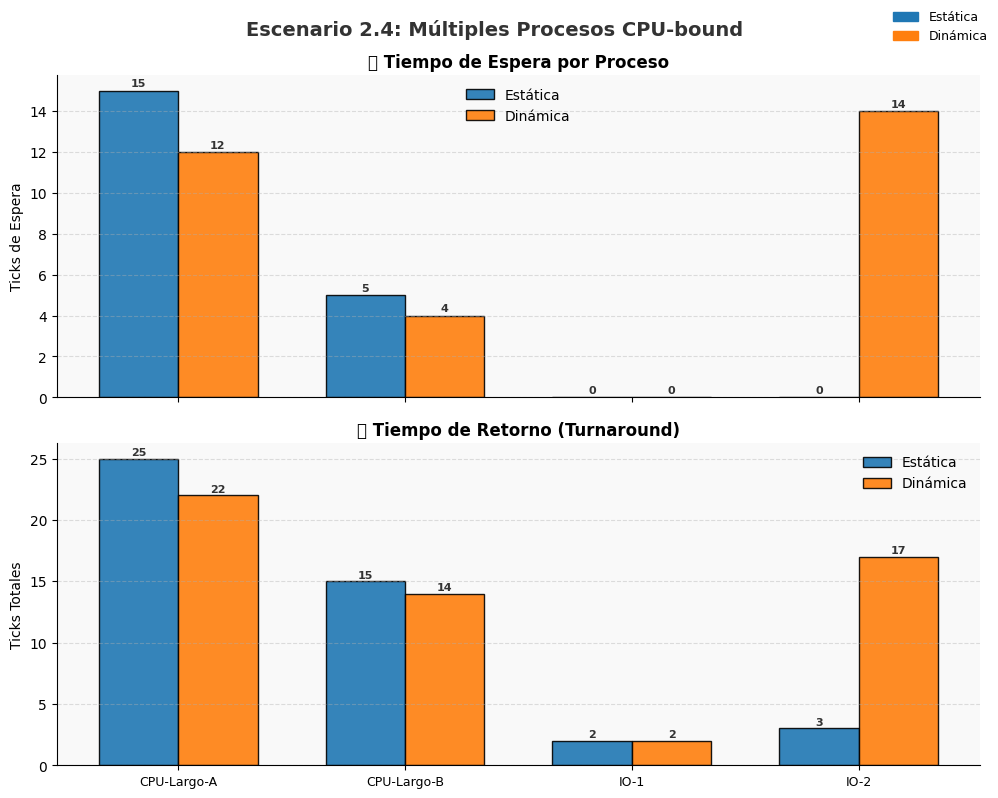


📋 Resultados: Prioridad Estática (2.4)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,CPU-Largo-A,0,10,5,0,25,15,25
1,CPU-Largo-B,1,10,4,1,16,5,15
2,IO-1,3,2,1,3,5,0,2
3,IO-2,8,3,2,8,11,0,3



📋 Resultados: Prioridad Dinámica (2.4)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,CPU-Largo-A,0,10,5,0,22,12,22
1,CPU-Largo-B,1,10,4,1,15,4,14
2,IO-1,3,2,1,3,5,0,2
3,IO-2,8,3,2,22,25,14,17


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,CPU-Largo-A,0,10,5,0,22,12,22
1,CPU-Largo-B,1,10,4,1,15,4,14
2,IO-1,3,2,1,3,5,0,2
3,IO-2,8,3,2,22,25,14,17


In [ ]:
# --- 2.4 Definición del Experimento ---
titulo_2_4 = "Escenario 2.4: Múltiples Procesos CPU-bound"
procesos_2_4 = [
    {"id": "CPU-Largo-A", "llegada": 0, "duracion": 10, "prioridad": 5}, # <-- El más bajo
    {"id": "CPU-Largo-B", "llegada": 1, "duracion": 10, "prioridad": 4},

    {"id": "IO-1",        "llegada": 3, "duracion": 2,  "prioridad": 1}, # Interrupciones
    {"id": "IO-2",        "llegada": 8, "duracion": 3,  "prioridad": 2},
]

# --- Simulación ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_2_4)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_2_4)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_2_4, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Estática (2.4)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Dinámica (2.4)")

## Escenario: Alta concurrencia vs. Baja concurrencia
Comparar el rendimiento cuando los procesos llegan muy espaciados (Baja Concurrencia) contra cuando llegan todos al mismo tiempo o en un flujo constante (Alta Concurrencia).

### Experimento 1 (Baja Concurrencia (Línea Base))  

Este es el caso "fácil" o línea base. Los procesos llegan tan espaciados que el proceso anterior casi siempre termina antes de que llegue el siguiente.

Qué observar:

Las barras de Estática (Azul) y Dinámica (Naranja) serán casi idénticas.

Como no hay competencia (casi no hay cola de listos), el "envejecimiento" no tiene oportunidad de actuar y la prioridad casi no importa (solo importa el FCFS).

Los tiempos de espera para todos los procesos serán cero o casi cero.

/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


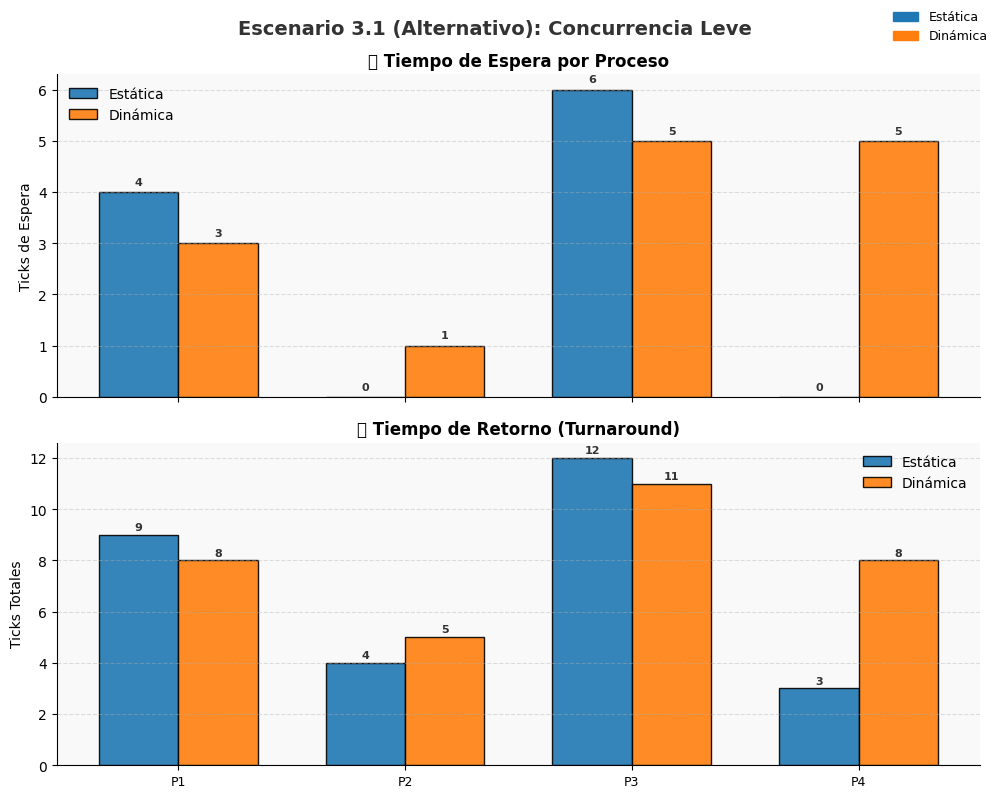


📋 Resultados: Prioridad Estática (3.1 Alt)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1,0,5,3,0,9,4,9
1,P2,4,4,1,4,8,0,4
2,P3,6,6,5,9,18,6,12
3,P4,10,3,2,10,13,0,3



📋 Resultados: Prioridad Dinámica (3.1 Alt)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1,0,5,3,0,8,3,8
1,P2,4,4,1,4,9,1,5
2,P3,6,6,5,9,17,5,11
3,P4,10,3,2,11,18,5,8


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1,0,5,3,0,8,3,8
1,P2,4,4,1,4,9,1,5
2,P3,6,6,5,9,17,5,11
3,P4,10,3,2,11,18,5,8


In [ ]:
# --- 3.1 Definición del Experimento (Versión Alternativa con Solapamiento) ---
titulo_3_1_alt = "Escenario 3.1 (Alternativo): Concurrencia Leve"
procesos_3_1_alt = [
    # P1 (Baja Pri) empieza primero
    {"id": "P1", "llegada": 0, "duracion": 5, "prioridad": 3},

    # P2 (Alta Pri) llega ANTES de que P1 termine
    {"id": "P2", "llegada": 4, "duracion": 4, "prioridad": 1},

    # P3 (Baja Pri) llega mientras P2 está corriendo
    {"id": "P3", "llegada": 6, "duracion": 6, "prioridad": 5},

    # P4 (Media Pri) llega después de P2
    {"id": "P4", "llegada": 10, "duracion": 3, "prioridad": 2},
]

# --- Simulación ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_3_1_alt)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_3_1_alt)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_3_1_alt, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Estática (3.1 Alt)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Dinámica (3.1 Alt)")

### Experimento 2 (Alta Concurrencia (Tipo "Burst" o Explosión))  

Este es el opuesto directo al 3.1. Todos los procesos llegan exactamente al mismo tiempo (t=0), creando una "explosión" de trabajo.

Qué observar:

Este escenario es idéntico al "Conflicto Extremo" (1.1). Es la prueba de estrés de "alta concurrencia" más pura.

Estática (Azul): Mostrará una gran diferencia en los tiempos de espera, siguiendo estrictamente el orden de prioridad (P5 -> P2 -> P3 -> P1 -> P4).

Dinámica (Naranja): El "envejecimiento" será muy agresivo. Los procesos de baja prioridad (P1, P4) serán "salvados" y sus tiempos de espera mejorarán drásticamente.

/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


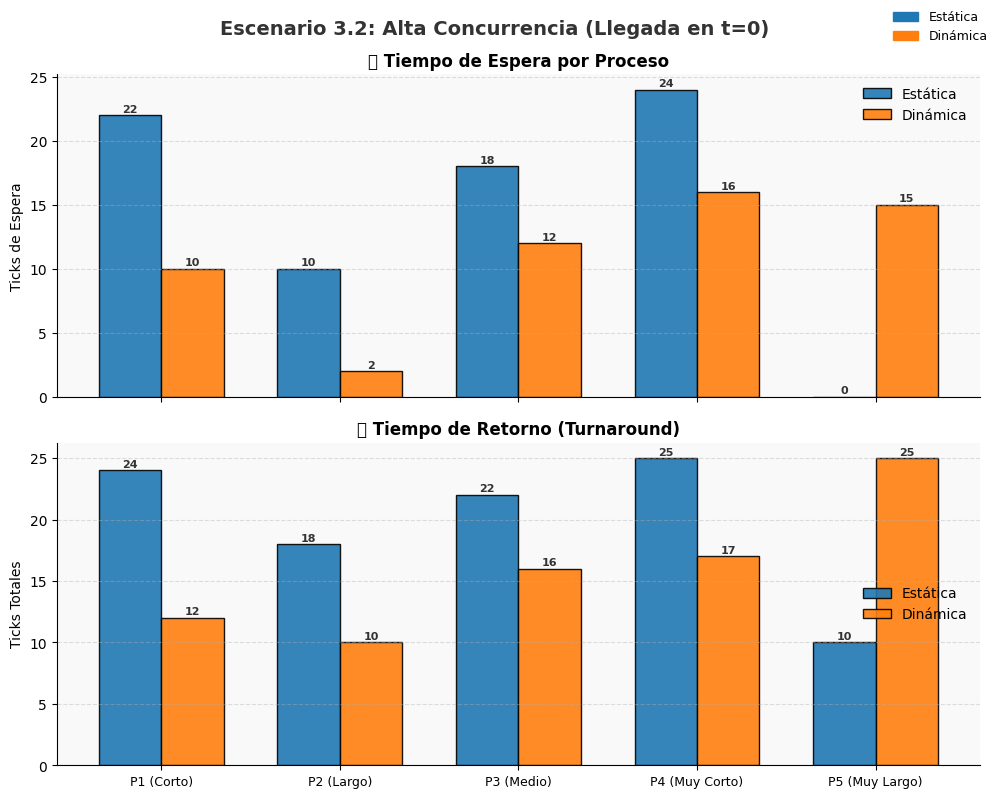


📋 Resultados: Prioridad Estática (3.2)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Corto),0,2,4,22,24,22,24
1,P2 (Largo),0,8,2,10,18,10,18
2,P3 (Medio),0,4,3,18,22,18,22
3,P4 (Muy Corto),0,1,5,24,25,24,25
4,P5 (Muy Largo),0,10,1,0,10,0,10



📋 Resultados: Prioridad Dinámica (3.2)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Corto),0,2,4,10,12,10,12
1,P2 (Largo),0,8,2,2,10,2,10
2,P3 (Medio),0,4,3,12,16,12,16
3,P4 (Muy Corto),0,1,5,16,17,16,17
4,P5 (Muy Largo),0,10,1,0,25,15,25


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,P1 (Corto),0,2,4,10,12,10,12
1,P2 (Largo),0,8,2,2,10,2,10
2,P3 (Medio),0,4,3,12,16,12,16
3,P4 (Muy Corto),0,1,5,16,17,16,17
4,P5 (Muy Largo),0,10,1,0,25,15,25


In [ ]:
# --- 3.2 Definición del Experimento ---
titulo_3_2 = "Escenario 3.2: Alta Concurrencia (Llegada en t=0)"
procesos_3_2 = [
    # Todos llegan a la vez
    {"id": "P1 (Corto)", "llegada": 0, "duracion": 2, "prioridad": 4},
    {"id": "P2 (Largo)", "llegada": 0, "duracion": 8, "prioridad": 2},
    {"id": "P3 (Medio)", "llegada": 0, "duracion": 4, "prioridad": 3},
    {"id": "P4 (Muy Corto)","llegada": 0, "duracion": 1, "prioridad": 5}, # <-- Peor prioridad
    {"id": "P5 (Muy Largo)","llegada": 0, "duracion": 10,"prioridad": 1}, # <-- Mejor prioridad
]

# --- Simulación ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_3_2)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_3_2)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_3_2, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Estática (3.2)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Dinámica (3.2)")

### Experimento 3 (Alta Concurrencia (Flujo Constante = Inanición))  

Este escenario combina los dos anteriores. Demuestra el peligro de la alta concurrencia. No es una sola explosión en t=0, sino un flujo constante de nuevos procesos que mantiene el sistema siempre ocupado.

Qué observar:

Estática (Azul): Verás la inanición (starvation). La P-Victima (Pri 10) llegó en t=0, pero como el sistema está siempre ocupado con procesos de Flujo (Pri 5), la víctima nunca es elegida. Su barra de espera será la más grande de todos los experimentos.

Dinámica (Naranja): El "envejecimiento" salvará a la P-Victima. Mientras los procesos de Flujo corren, su prioridad subirá (10, 9, 8...) hasta que sea lo suficientemente alta (ej. Pri 4) para interrumpir al flujo y ejecutarse.

/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3475987644.py:213: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9203 (\N{HOURGLASS WITH FLOWING SAND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


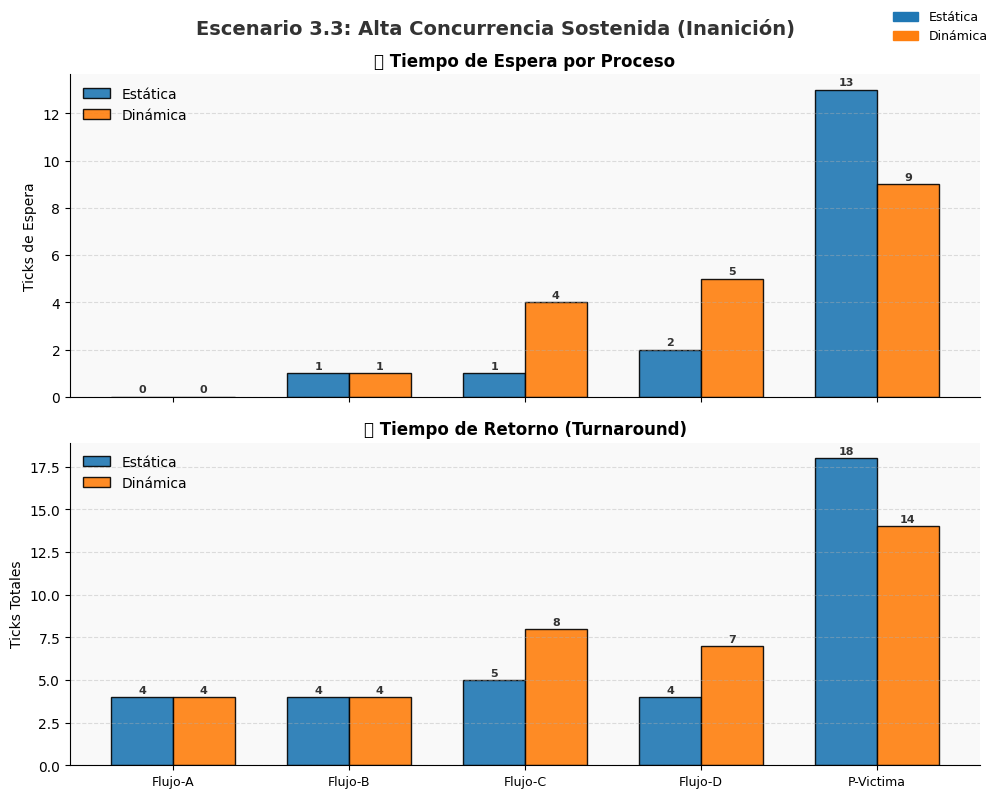


📋 Resultados: Prioridad Estática (3.3)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,Flujo-A,2,4,5,2,6,0,4
1,Flujo-B,5,3,5,6,9,1,4
2,Flujo-C,8,4,5,9,13,1,5
3,Flujo-D,11,2,5,13,15,2,4
4,P-Victima,0,5,10,0,18,13,18



📋 Resultados: Prioridad Dinámica (3.3)


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,Flujo-A,2,4,5,2,6,0,4
1,Flujo-B,5,3,5,6,9,1,4
2,Flujo-C,8,4,5,11,16,4,8
3,Flujo-D,11,2,5,16,18,5,7
4,P-Victima,0,5,10,0,14,9,14


,PID,Llegada,Duración,Prioridad Estática,Inicio,Finalización,Espera,Retorno
0,Flujo-A,2,4,5,2,6,0,4
1,Flujo-B,5,3,5,6,9,1,4
2,Flujo-C,8,4,5,11,16,4,8
3,Flujo-D,11,2,5,16,18,5,7
4,P-Victima,0,5,10,0,14,9,14


In [ ]:
# --- 3.3 Definición del Experimento ---
titulo_3_3 = "Escenario 3.3: Alta Concurrencia Sostenida (Inanición)"
procesos_3_3 = [
    {"id": "P-Victima", "llegada": 0, "duracion": 5, "prioridad": 10}, # <-- Prioridad 10 (muy mala)

    # "Alta concurrencia": Un flujo constante de prioridad media
    {"id": "Flujo-A",   "llegada": 2, "duracion": 4, "prioridad": 5},
    {"id": "Flujo-B",   "llegada": 5, "duracion": 3, "prioridad": 5},
    {"id": "Flujo-C",   "llegada": 8, "duracion": 4, "prioridad": 5},
    {"id": "Flujo-D",   "llegada": 11,"duracion": 2, "prioridad": 5},
]

# --- Simulación ---
lista_obj_est = crear_lista_procesos_desde_dict(procesos_3_3)
lista_obj_din = crear_lista_procesos_desde_dict(procesos_3_3)

res_est = simular_planificacion(lista_obj_est, 'estatica')
res_din = simular_planificacion(lista_obj_din, 'dinamica')

# --- Resultados ---
generar_grafico_escenario(titulo_3_3, res_est, res_din)
mostrar_tabla_resultados(res_est, "Resultados: Prioridad Estática (3.3)")
mostrar_tabla_resultados(res_din, "Resultados: Prioridad Dinámica (3.3)")